## Task 1 : Retrieving and Preparing the Data

We have chosen the Online Shoppers Purchasing Intention Dataset

In [1]:
#Importing the relevent modules
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests
pd.set_option('display.max_columns', None) 
###
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")
from matplotlib import rcParams

In [2]:
#Reading the dataset
df = pd.read_csv("online_shoppers_intention.csv")
shoppers_data = df.copy()
#displaying 10 random rows in the dataset
shoppers_data.sample(10, random_state = 999)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
332,1,21.000000,3,116.0,21,613.666667,0.008333,0.023611,0.000000,0.0,Mar,1,2,1,1,Returning_Visitor,False,False
8274,11,233.475000,0,0.0,118,4251.208187,0.000000,0.012660,14.671986,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
10754,4,52.833333,0,0.0,57,1761.285714,0.006897,0.022221,0.000000,0.0,Nov,1,1,1,3,Returning_Visitor,True,False
4817,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,May,2,2,1,3,Returning_Visitor,False,False
436,0,0.000000,0,0.0,21,517.423809,0.019048,0.025000,0.000000,0.0,Mar,2,5,2,1,Returning_Visitor,False,False
3811,8,839.000000,0,0.0,72,1248.242262,0.000000,0.002597,13.363325,0.0,May,3,2,6,3,Returning_Visitor,True,False
2088,0,0.000000,0,0.0,10,111.000000,0.000000,0.020000,0.000000,0.0,Mar,2,4,7,3,Returning_Visitor,False,False
2928,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,May,2,4,6,6,Returning_Visitor,False,False
3488,3,51.500000,0,0.0,21,1623.500000,0.000000,0.005000,49.388600,0.6,May,2,4,2,3,New_Visitor,False,True
5112,0,0.000000,0,0.0,61,4501.433700,0.015000,0.036678,0.000000,0.2,May,4,5,3,2,Returning_Visitor,False,False


### Understanding the data

In [3]:
shoppers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

* The dataset has 18 columns and 12330 observations
* We have 14 columns with numerical values and 4 columns with categorical values
* There are no null values in the dataset

In [4]:
shoppers_data.shape

(12330, 18)

In [5]:
# groupng columns as per the types'
shoppers_data = shoppers_data.astype({'OperatingSystems': object, 'Browser': object, 'Region': object, 'TrafficType': object})
numerical_columns   = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
                'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical_columns = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend','Revenue']
timestamp   = ['Month']

### Data cleaning

#### Duplicate Data

In [6]:
#drop duplicate rows
shoppers_data.drop_duplicates(inplace = True)

In [7]:
#checking the dropped data percentage
print(f'Percentage of data dropped :{round(((len(df)-len(shoppers_data))/len(df))*100,2)}%')

Percentage of data dropped :1.01%


#### Check for missing values

We check the missing values in columns by displaying the number of missing values in every column

In [8]:
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent],axis = 1, keys = ['Missing Number', 'Missing Percent'])
    return missing_values

In [9]:
missing(shoppers_data)

,Missing Number,Missing Percent
Administrative,0,0.0
Administrative_Duration,0,0.0
Weekend,0,0.0
VisitorType,0,0.0
TrafficType,0,0.0
Region,0,0.0
Browser,0,0.0
OperatingSystems,0,0.0
Month,0,0.0
SpecialDay,0,0.0


Inference : No missing values to be handled in the dataset

#### Check for outliers

We check for outliers by plotting boxplots of all continuous variables

In [10]:
columns = shoppers_data.columns
non_numerical_columns = ['Month','VisitorType','Weekend','Revenue']
#selecting only numerical columns
selected_columns = [col for col in columns if col not in non_numerical_columns]

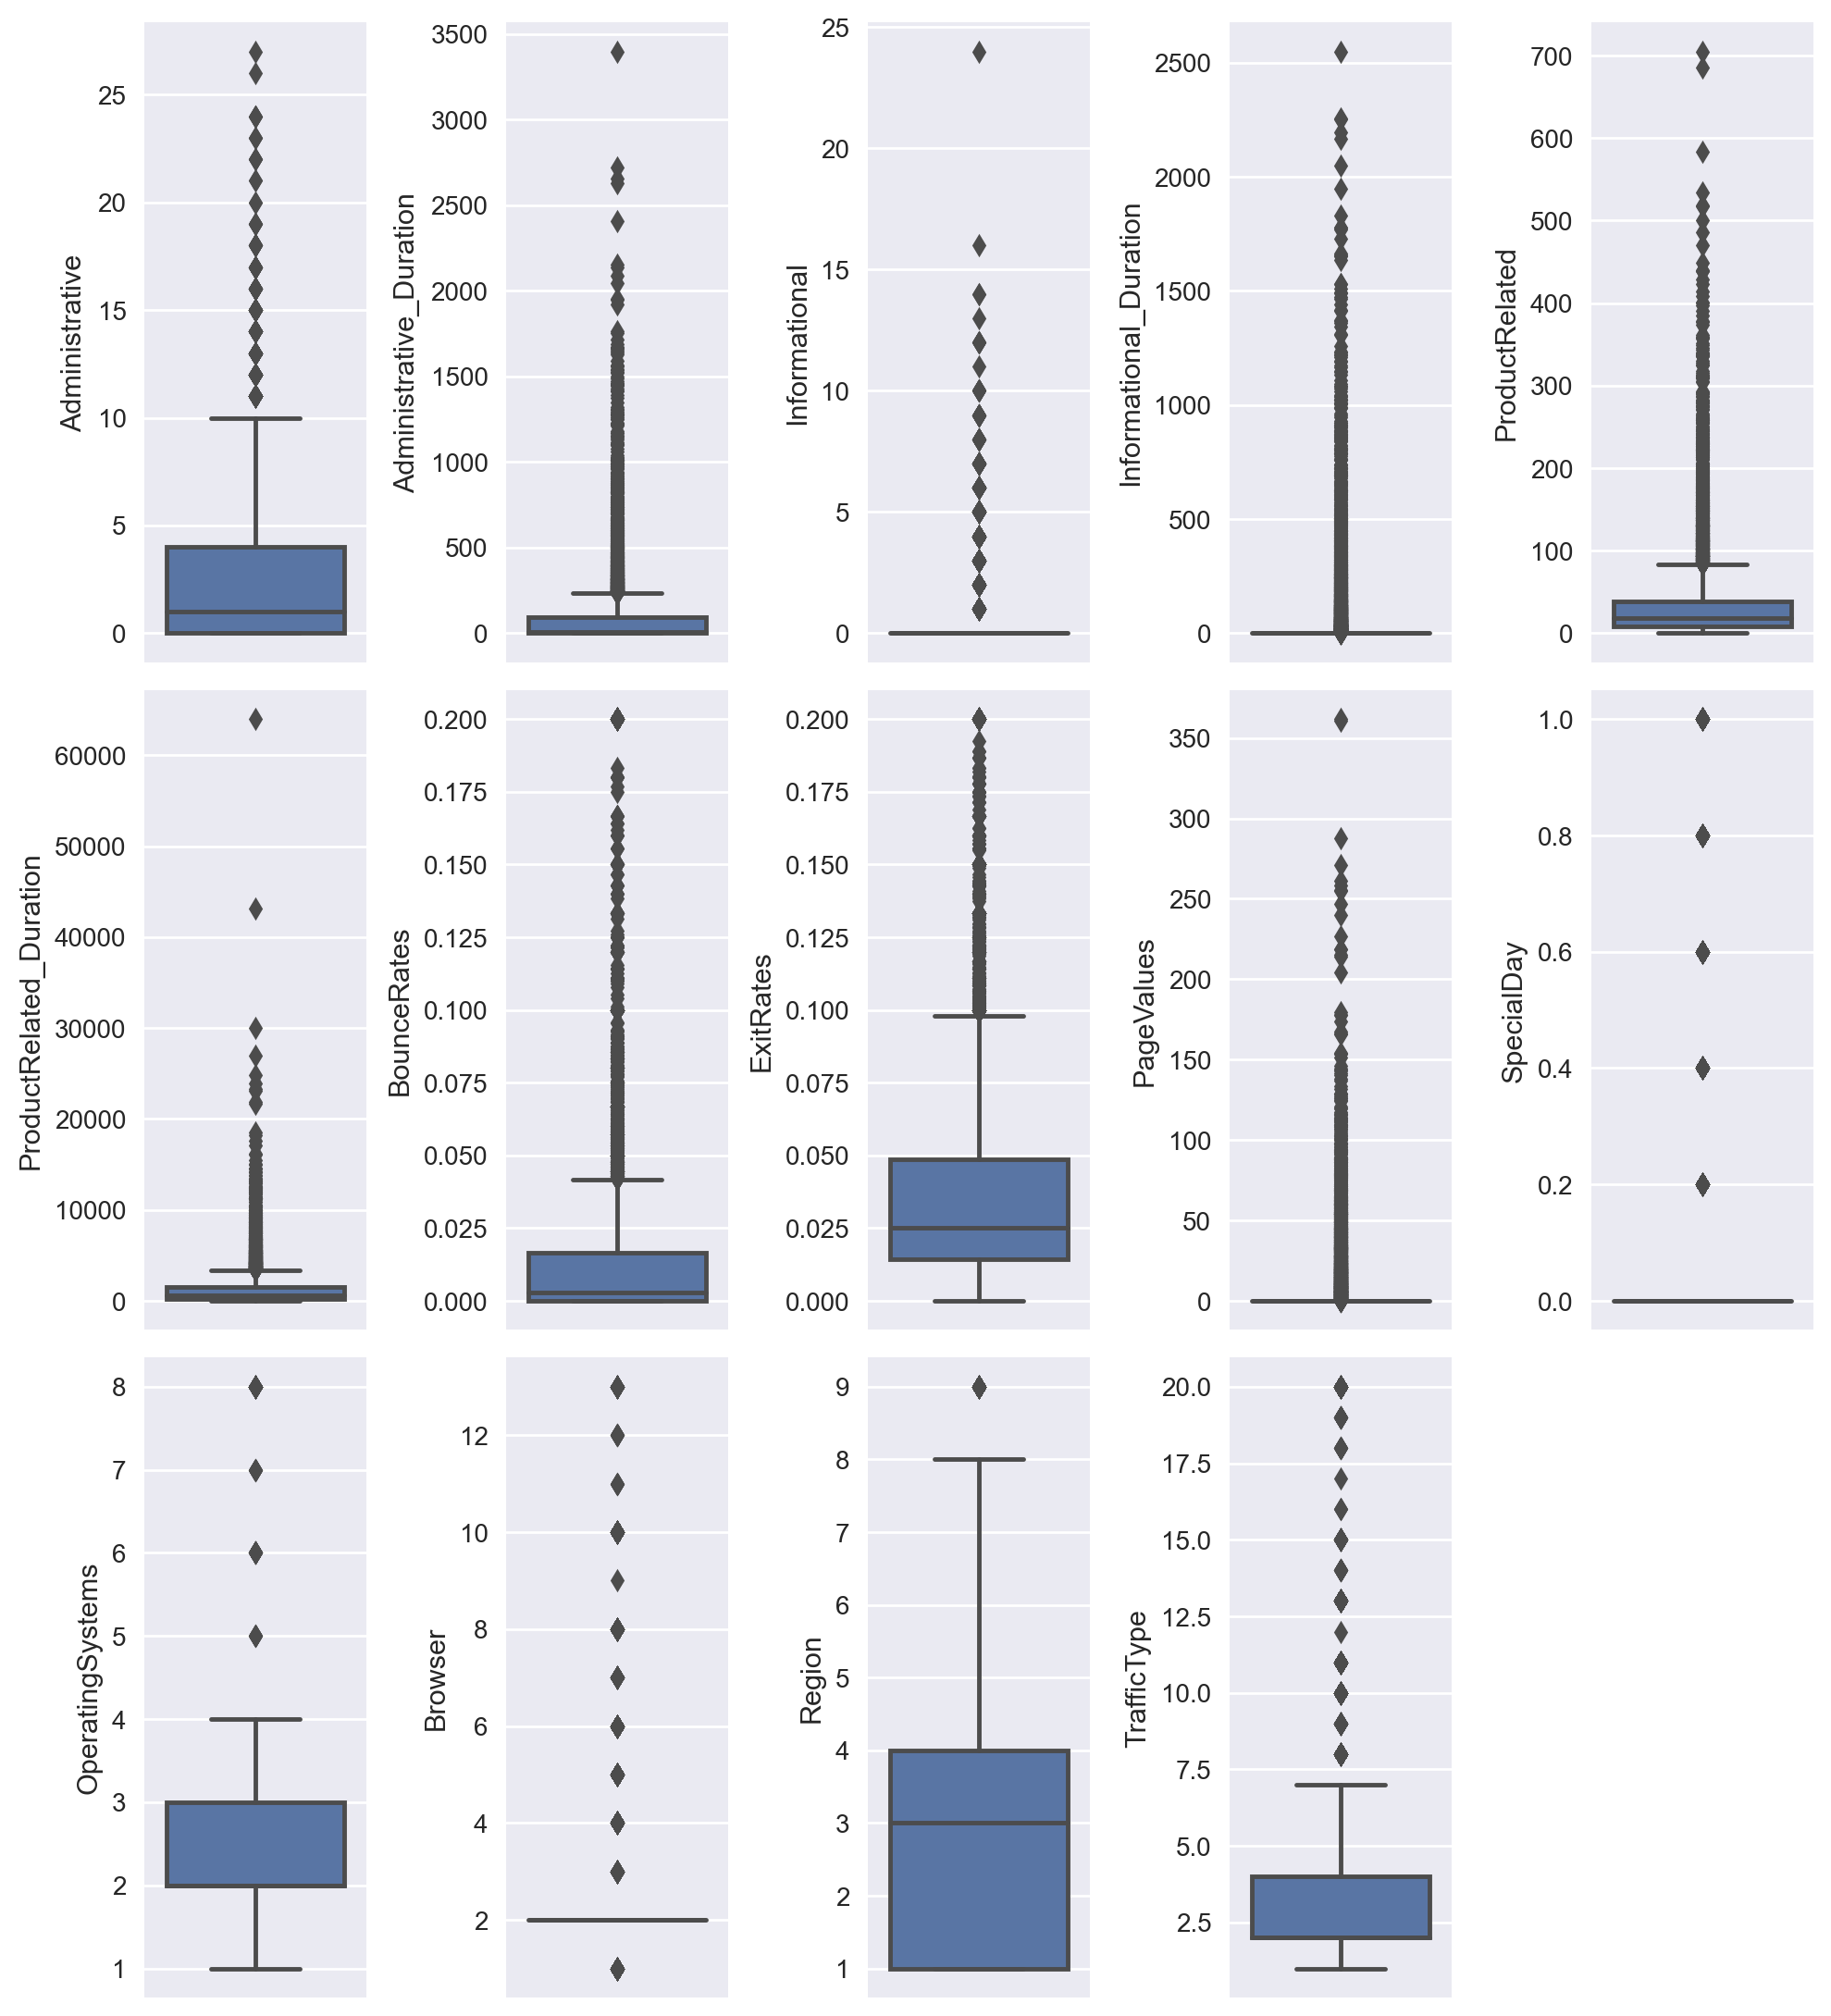

In [11]:
plt.figure(figsize = (10,11))
i = 1
for column in selected_columns:
    plt.subplot(3,5,i)
    sns.boxplot(y=column, data = shoppers_data)
    i +=1
plt.tight_layout()
plt.show()

Getting the number of outliers for each columns



In [12]:
def check_outliers(column):
    column = column.astype(np.float32)
    Q1 = np.percentile(column,25)
    Q3 = np.percentile(column,75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outlier_index = list(column.index[(column< lower_bound)| (column > upper_bound)])
    outlier_number = list(column[outlier_index])  
    return len(outlier_index)
        

In [13]:
#getting number of outliers
for i in numerical_columns:
    print(f'Number of outliers in {i} column : {check_outliers(shoppers_data[i])}')

Number of outliers in Administrative column : 404
Number of outliers in Administrative_Duration column : 1149
Number of outliers in Informational column : 2631
Number of outliers in Informational_Duration column : 2405
Number of outliers in ProductRelated column : 1007
Number of outliers in ProductRelated_Duration column : 951
Number of outliers in BounceRates column : 1428
Number of outliers in ExitRates column : 1325
Number of outliers in PageValues column : 2730
Number of outliers in SpecialDay column : 1249


Inference : The data has lot of zero values and hence the distribution of each feature is not clear. Because there are lot of zeroes we cannot handle outliers using log tranformation

* If outliers are removed, the percentage of removed values becomes 17.9% which is very large

* Also outliers make sense as in the case of Information_Duration which becomes a very large value if a visitor opens a web page and keeps it open on the device with out any action.

* Hence we have decided not to drop the outliers

**Converting Target Column and Categorical columns to Numeric**

In [14]:
shoppers_data['Revenue'] = shoppers_data['Revenue'].astype(int)
shoppers_data['Weekend'] = shoppers_data['Weekend'].astype(int)
month_categories = shoppers_data['Month'].unique()
category_dict = {category: i for i, category in enumerate(month_categories)}
shoppers_data['Month'] = shoppers_data['Month'].map(category_dict)

In [15]:
visitor_categories = shoppers_data['VisitorType'].unique()
category_dict = {category: i for i, category in enumerate(visitor_categories)}
shoppers_data['VisitorType'] = shoppers_data['VisitorType'].map(category_dict)

## Task 2: Data Exploration

#### Univariate Analysis

#### Statistics Summary

In [16]:
#numerical features
shoppers_data[numerical_columns].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


Inference:
* Q1, Q2, Q3 values for *Informational, Informational_Duration and SpecialDy* are all 0
* The maximum value for *PageValues* is very large which indicates an outlier

In [17]:
#categorical fetaure
shoppers_data[categorical_columns].describe()

,VisitorType,Weekend,Revenue
count,12205.000000,12205.000000,12205.000000
mean,0.151987,0.234248,0.156329
std,0.377057,0.423545,0.363182
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000


Exploring each attribute of the dataset

In [18]:
#FUNCTION TO PLOT PIE CHART
#plotting pie chart
# Get the value counts of the categories
def plot_pie(column, labels):
    
    #plt.rcParams['figure.figsize'] = (19, 10)
    value_counts = shoppers_data[column].value_counts()
   
    # Plotting a pie chart based on value counts
    plt.pie(value_counts, labels=labels, autopct='%1.1f%%')
    plt.axis('equal')

    # Add title
    plt.title(f'Distribution of {column}',fontsize = 12)

    # Display the chart
    plt.axis('off')
    plt.legend()
    plt.show()

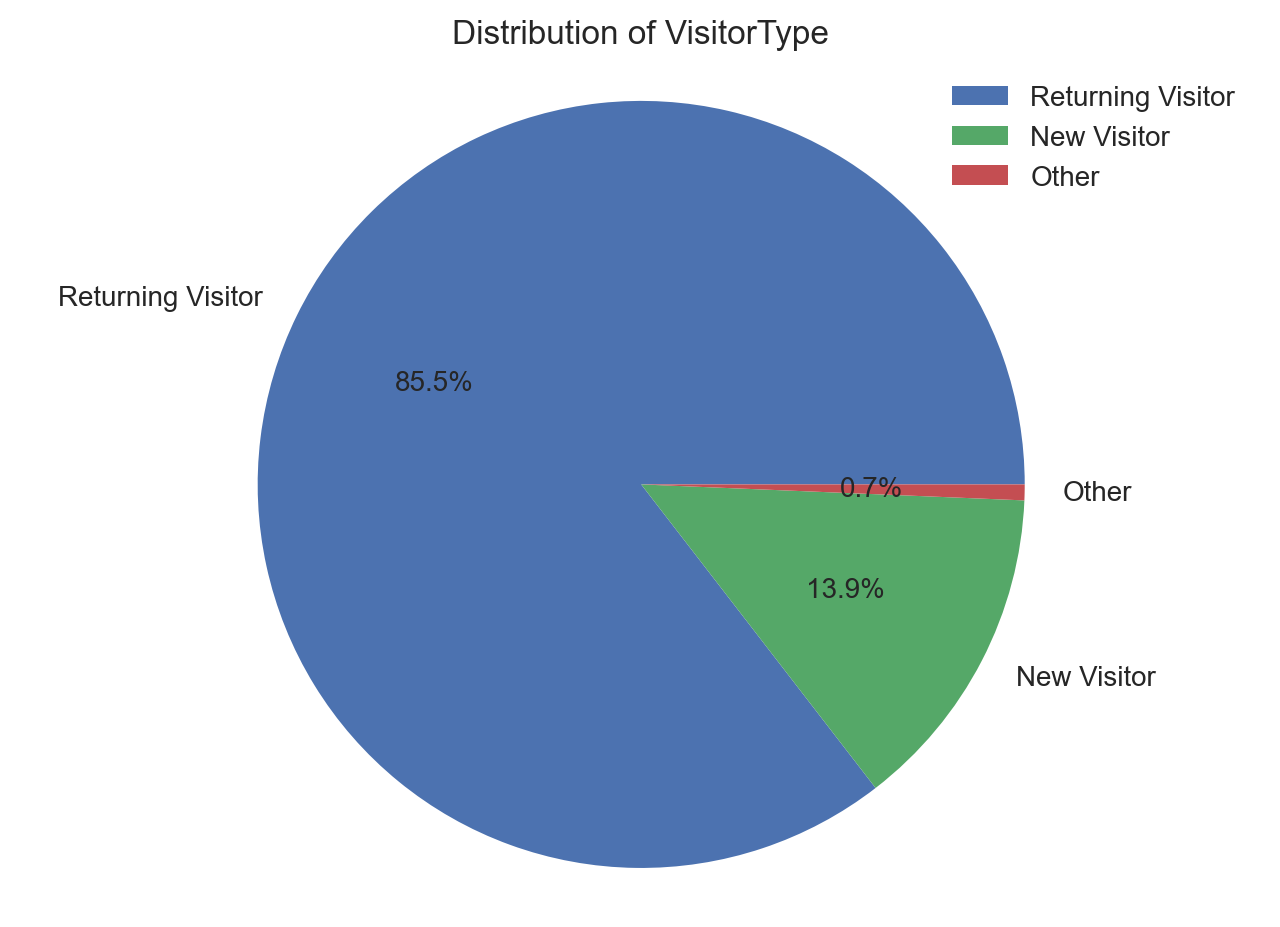

In [19]:
custom_labels = ['Returning Visitor', 'New Visitor', 'Other']
plot_pie('VisitorType', custom_labels)

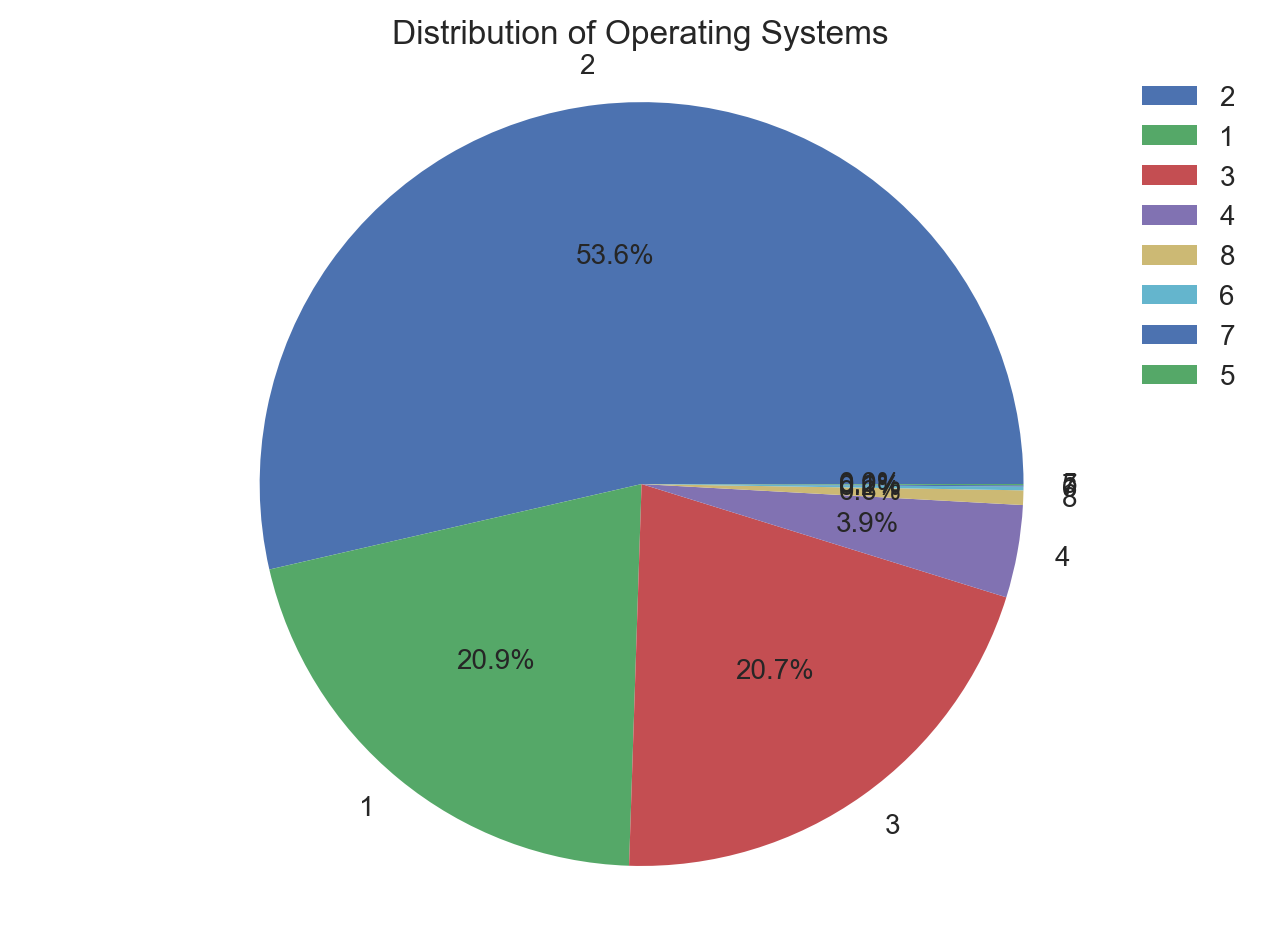

In [20]:

value_counts = shoppers_data['OperatingSystems'].value_counts()
   
# Plotting a pie chart based on value counts
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.axis('equal')

# Add title
plt.title(f'Distribution of Operating Systems',fontsize = 12)

# Display the chart
plt.axis('off')
plt.legend()
plt.show()

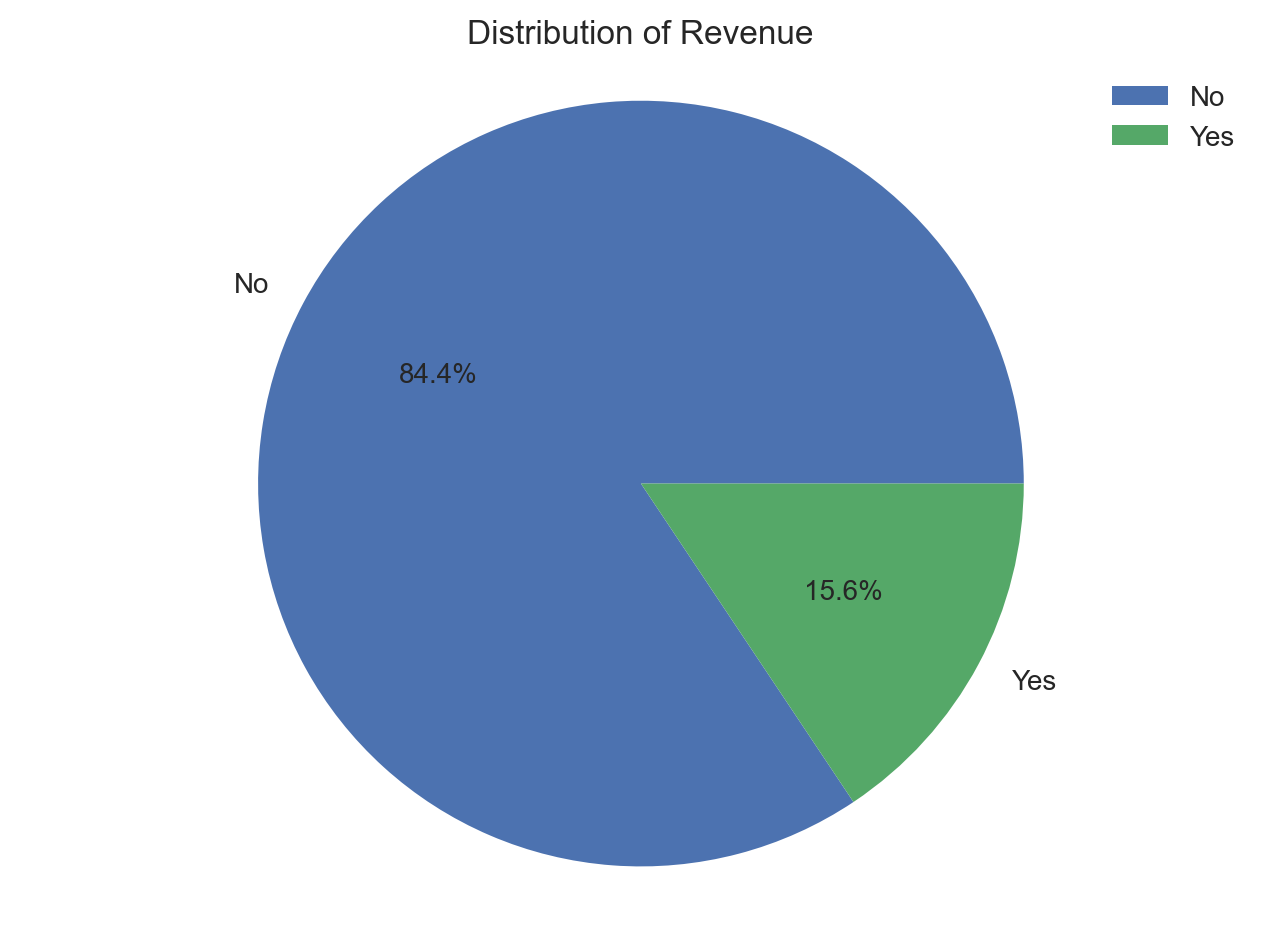

In [21]:
custom_labels = ['No','Yes']
plot_pie('Revenue',custom_labels)

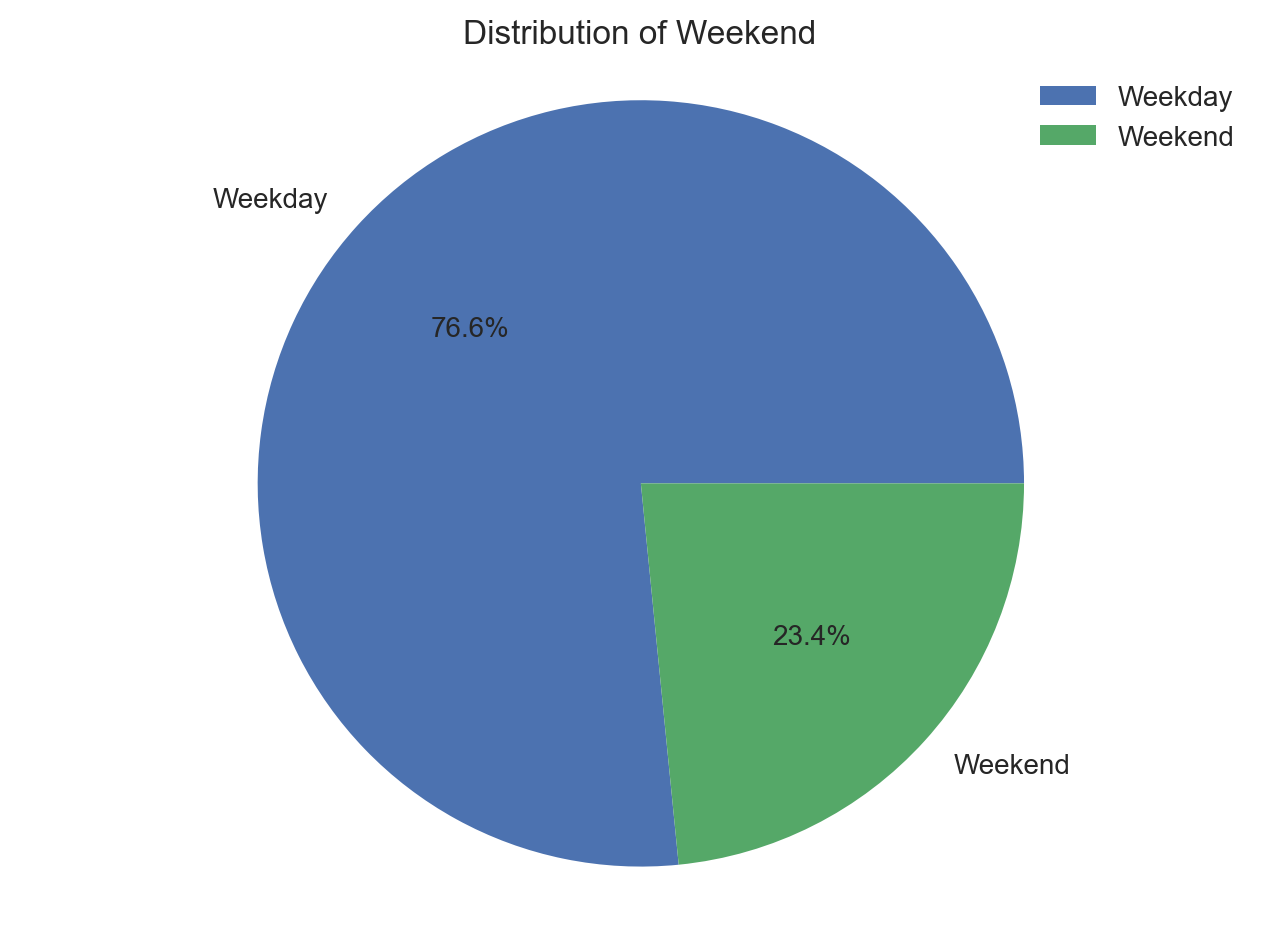

In [22]:
custom_labels = ['Weekday','Weekend']
plot_pie('Weekend',custom_labels)

In [23]:
#Function to plot Bar Chart

def plot_bar(column):
    value_counts = shoppers_data[column].value_counts()
    categories = value_counts.index
    counts = value_counts.values

    fig, ax = plt.subplots(figsize=(10,6 ))  # Adjust the figure size

    ax.bar(categories, counts, width=0.5)  # Adjust the bar width as needed
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of {column}', fontsize=12)

    # Set the x-axis tick locations and labels as integers
    ax.set_xticks(categories)
    ax.set_xticklabels(categories.astype(int), rotation='vertical', ha='center')

    plt.tight_layout()  # Adjust the spacing between the subplots

    plt.show()


In [24]:
#Function to plot Histogram
def plot_histogram(column):
    plt.figure(figsize=(6, 4))  # Set the figure size as desired (e.g., 4x4 inches)
    plt.hist(shoppers_data[column], bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

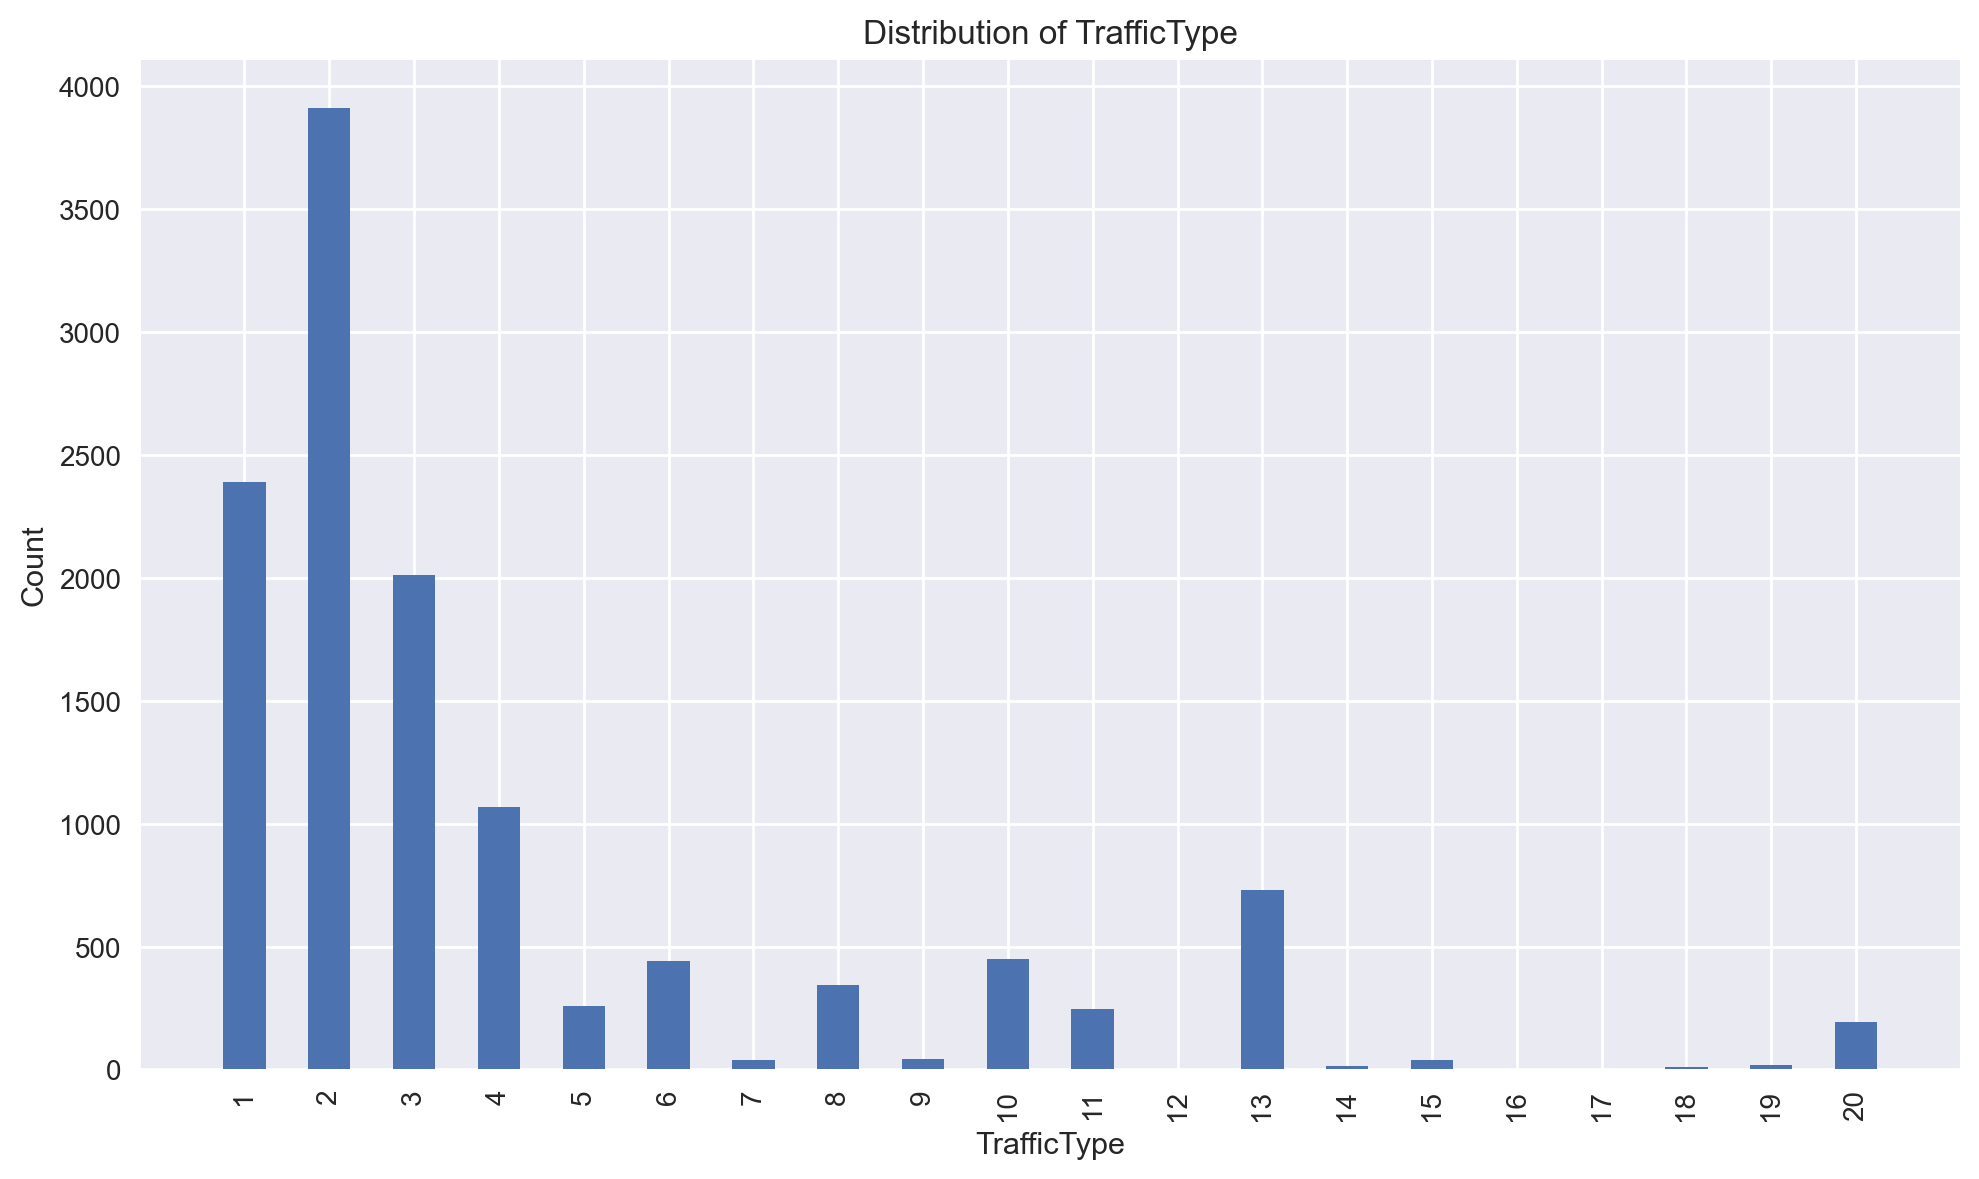

In [25]:
plot_bar('TrafficType')

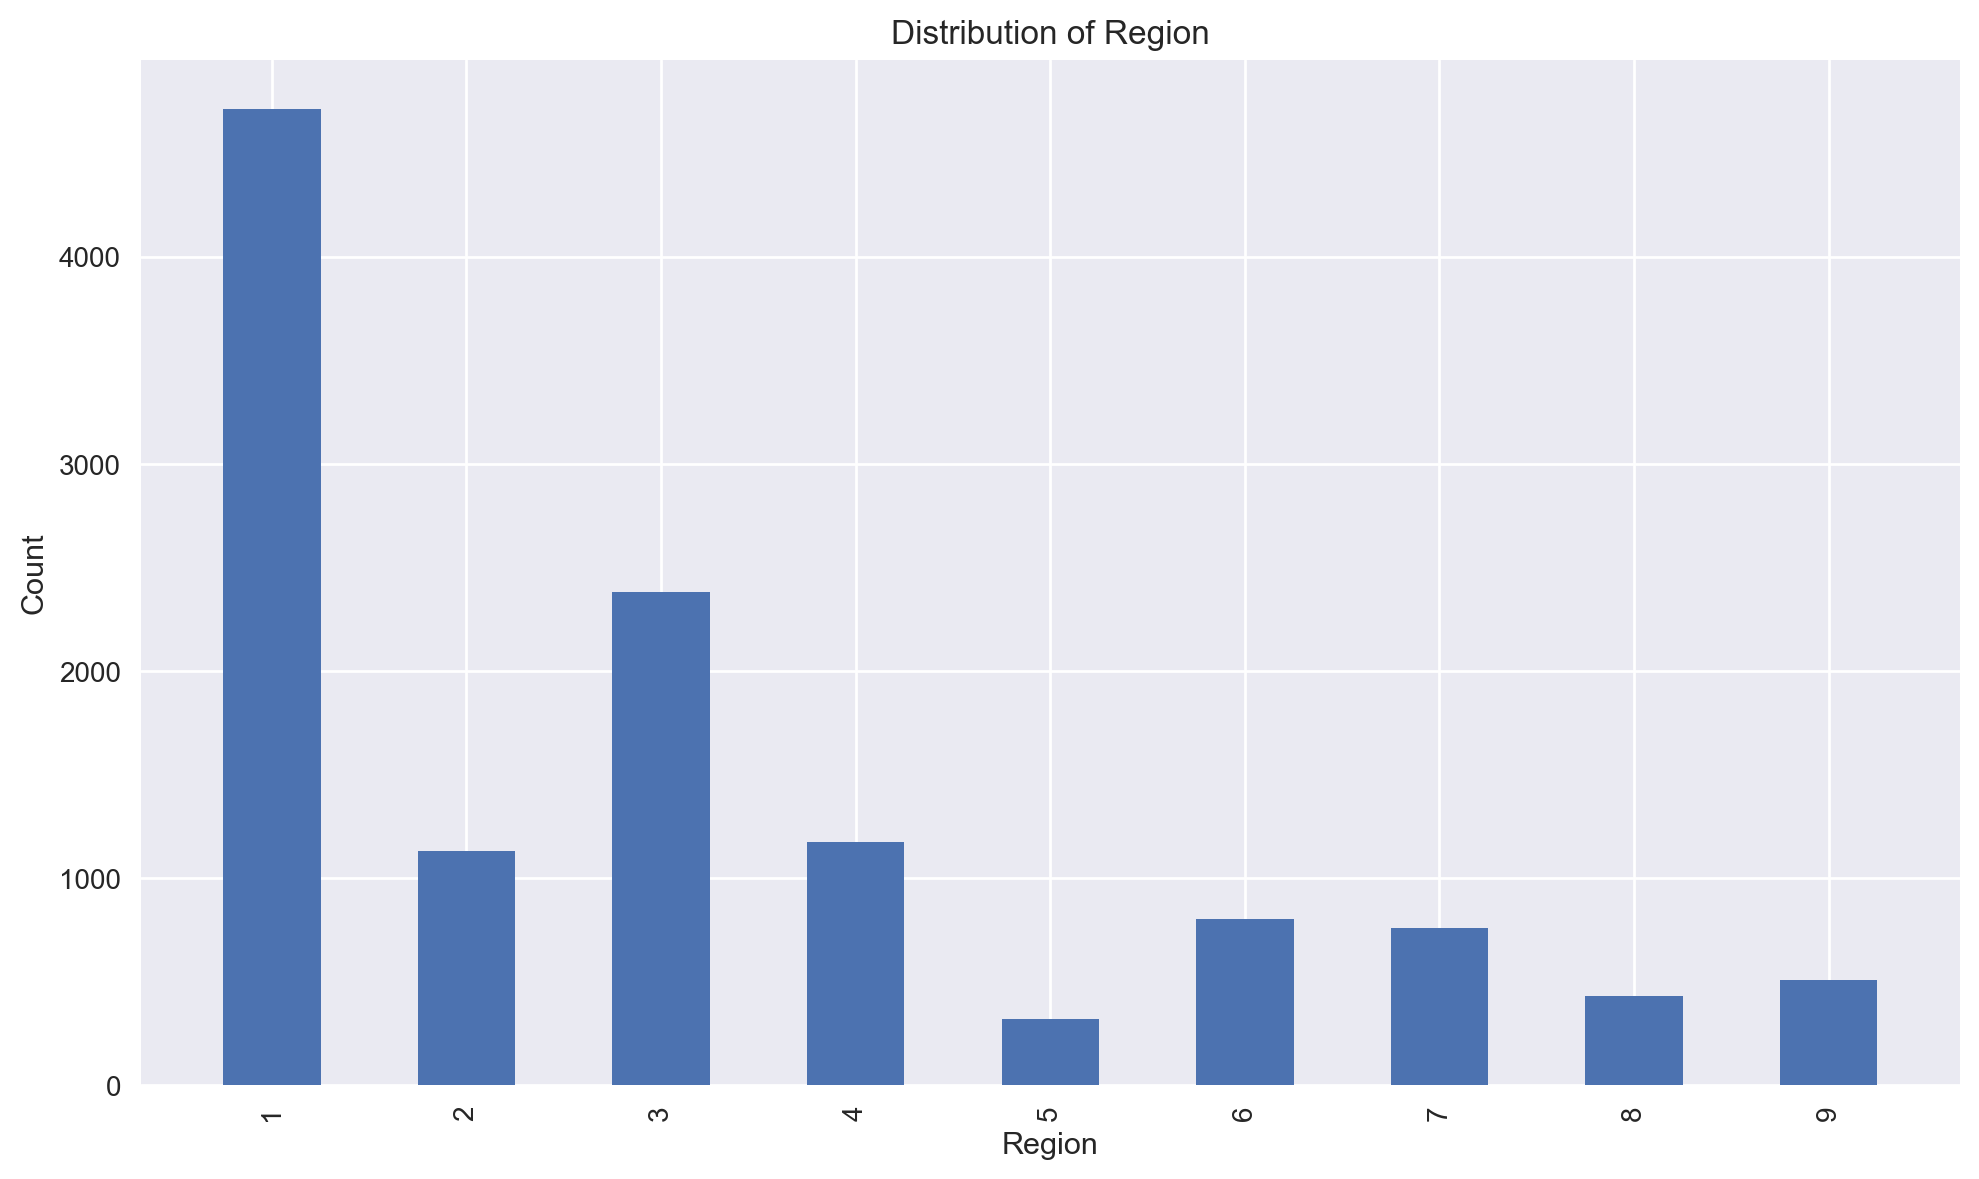

In [26]:
plot_bar('Region')

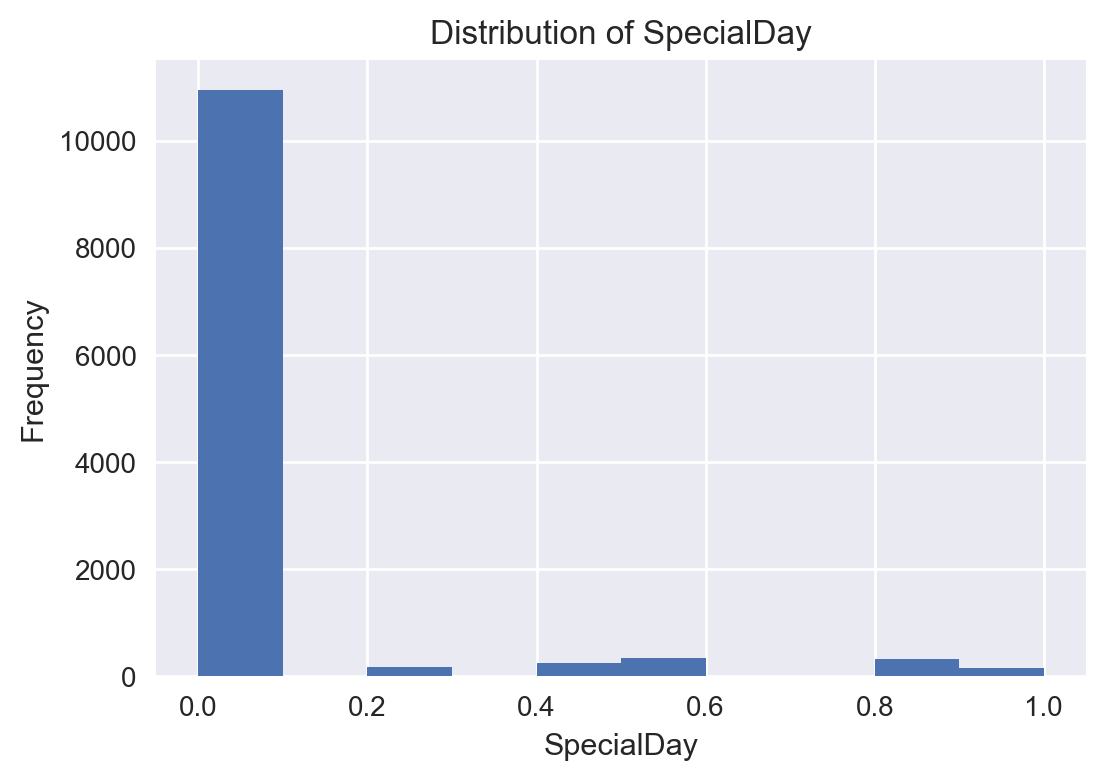

In [27]:
plot_histogram('SpecialDay')

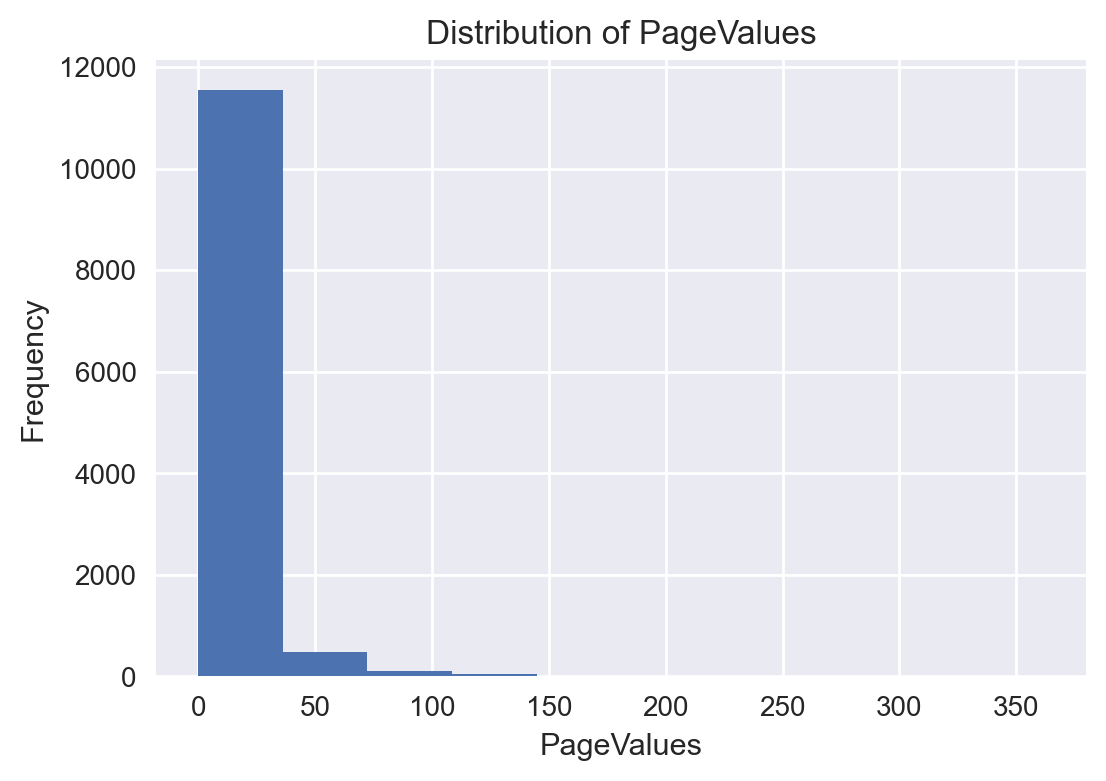

In [28]:
plot_histogram('PageValues')

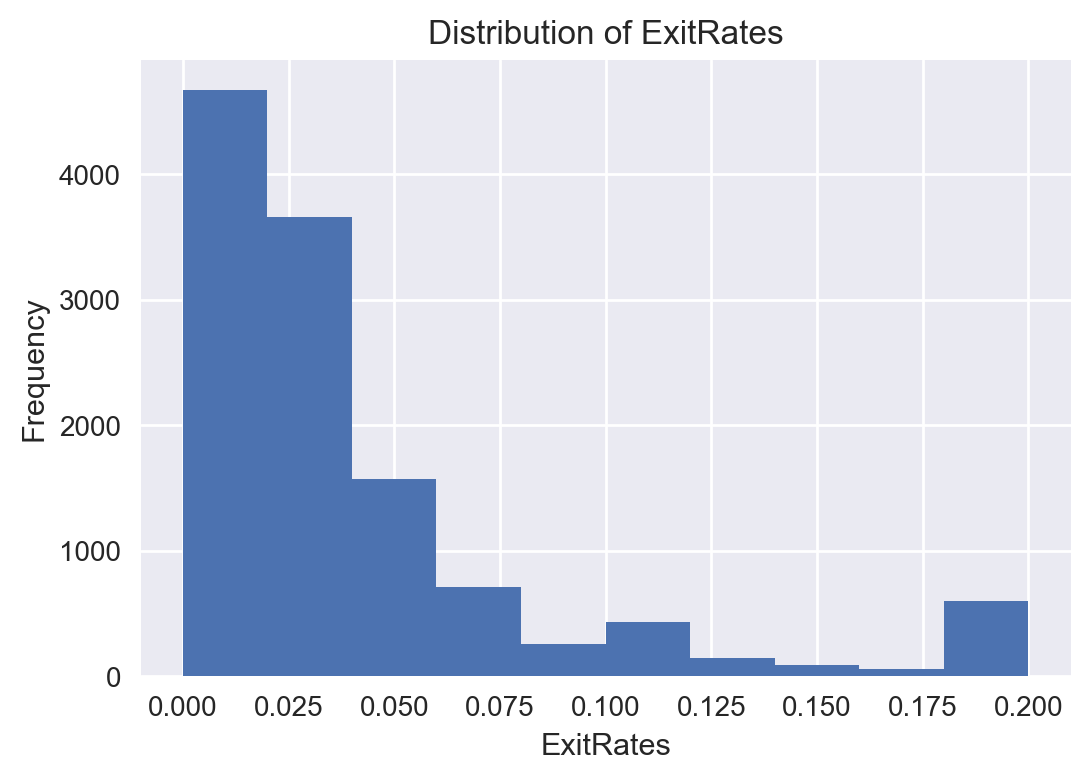

In [29]:
plot_histogram('ExitRates')

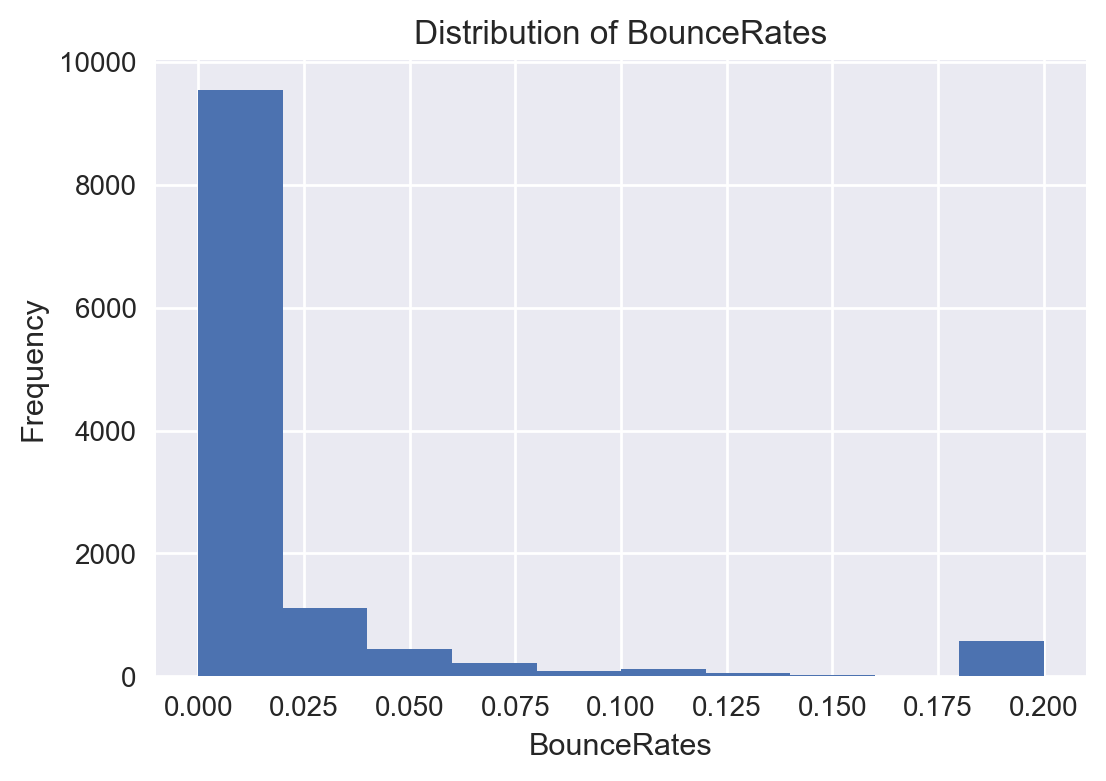

In [30]:
plot_histogram('BounceRates')

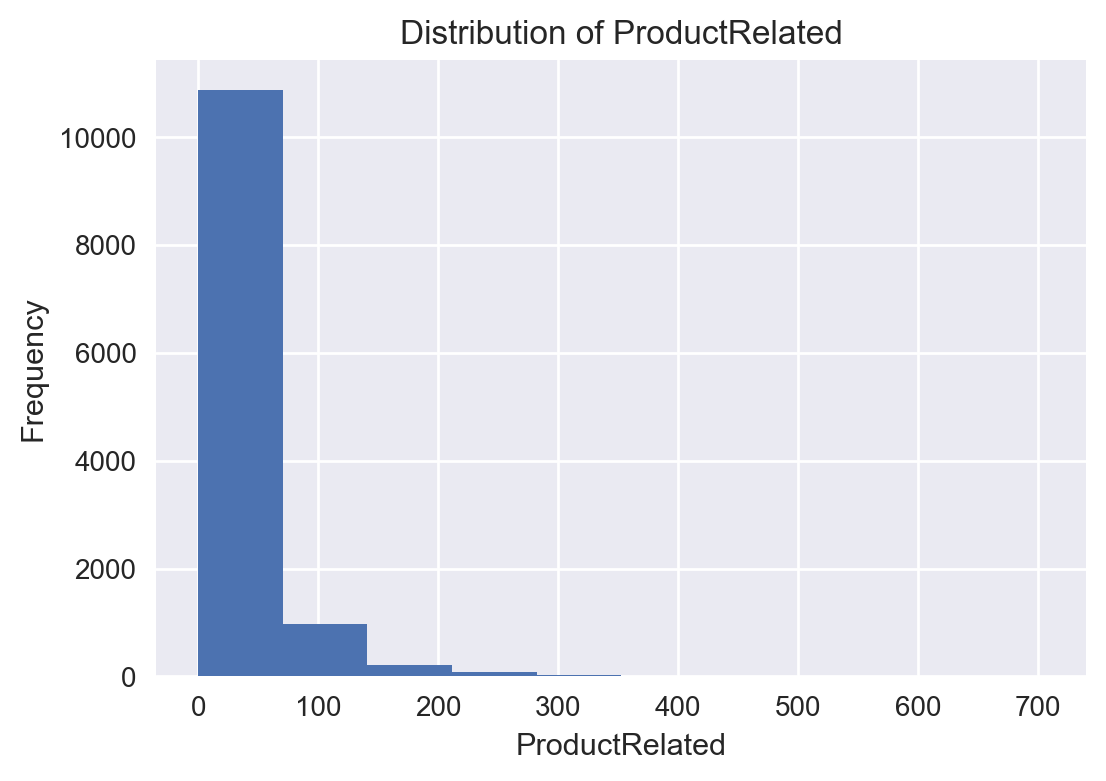

In [31]:
plot_histogram('ProductRelated')

#### Bivariate Analysis

#### Examining the trend of purchases made with respect to other features

1. Relationship between **VisitorType and Revenue**

In [32]:
# the number of users who made purchases and not for any other features
def bivariate_plot(column):
    rcParams['figure.figsize'] = 10, 5
    sns.countplot(data = shoppers_data, x = column, hue = 'Revenue')
    plt.title(f'{column} vs Revenue', fontsize = 12)
    plt.tight_layout()
    plt.show()

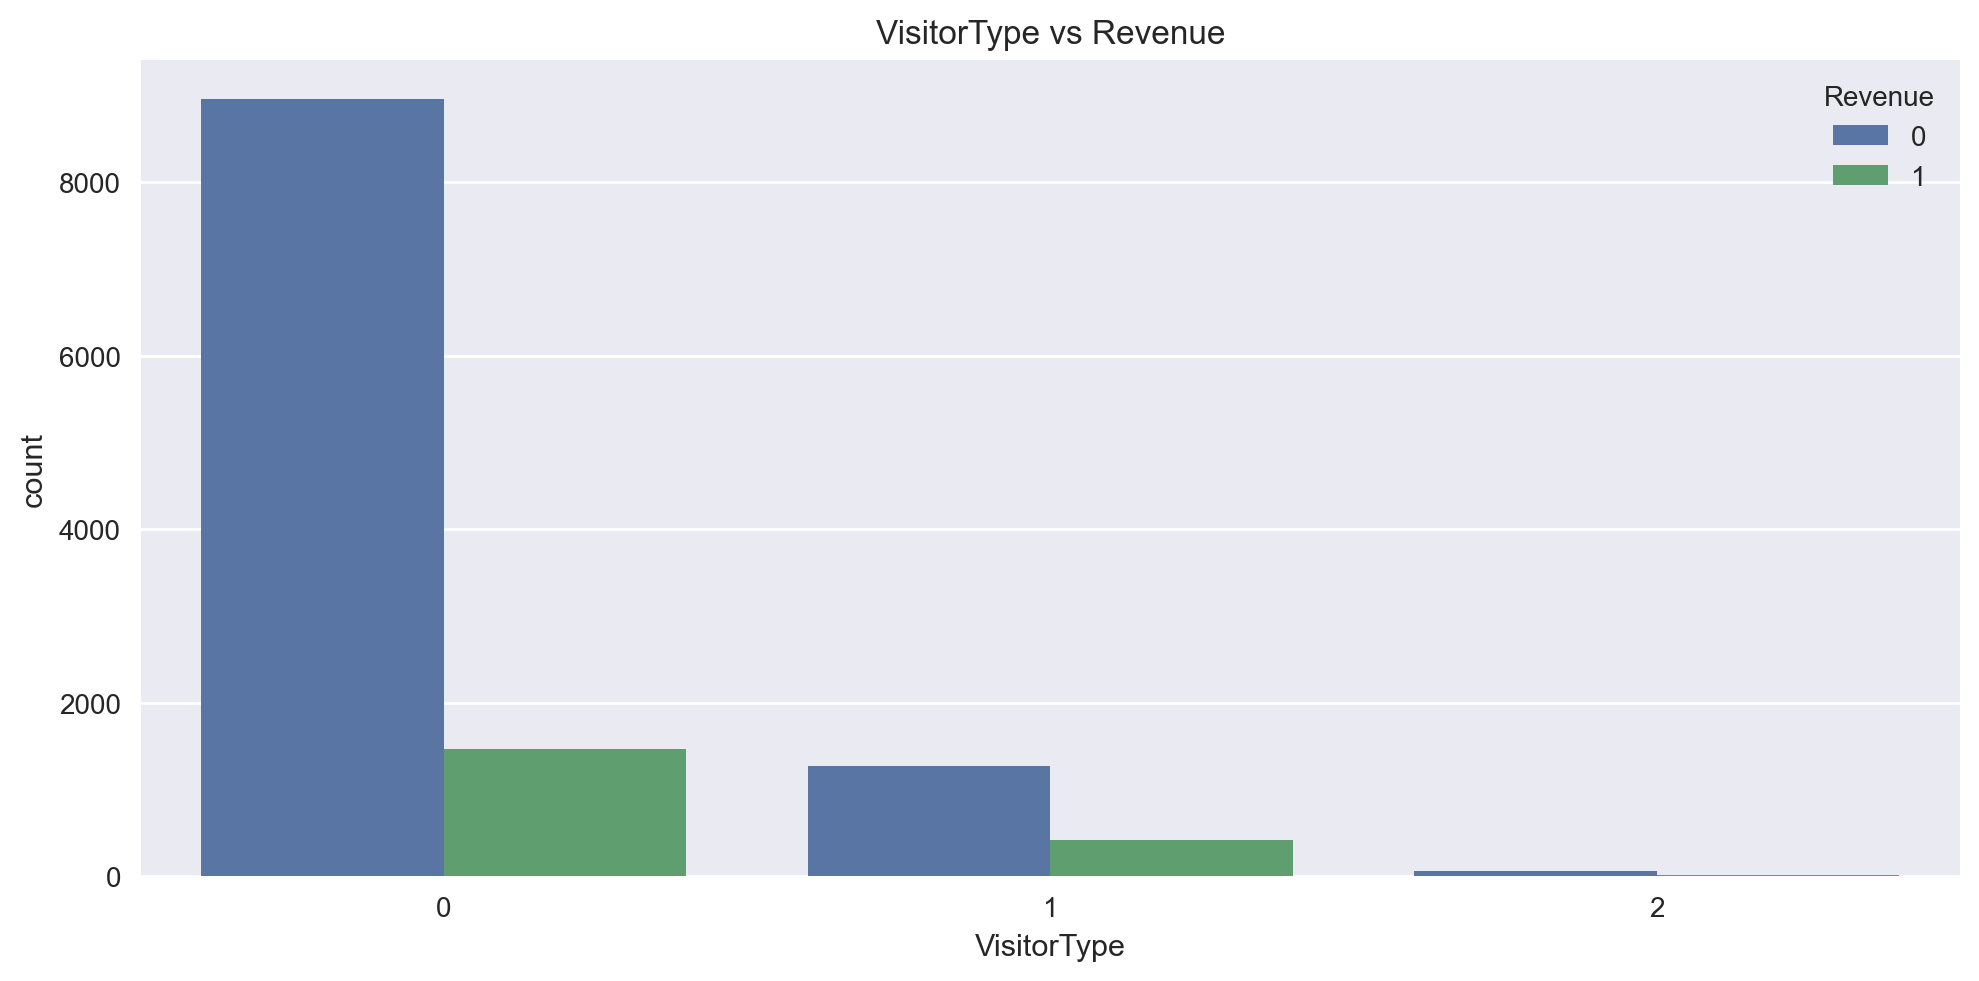

In [33]:
bivariate_plot('VisitorType')

2. Relationship between **Weekend/Weekday and Revenue**

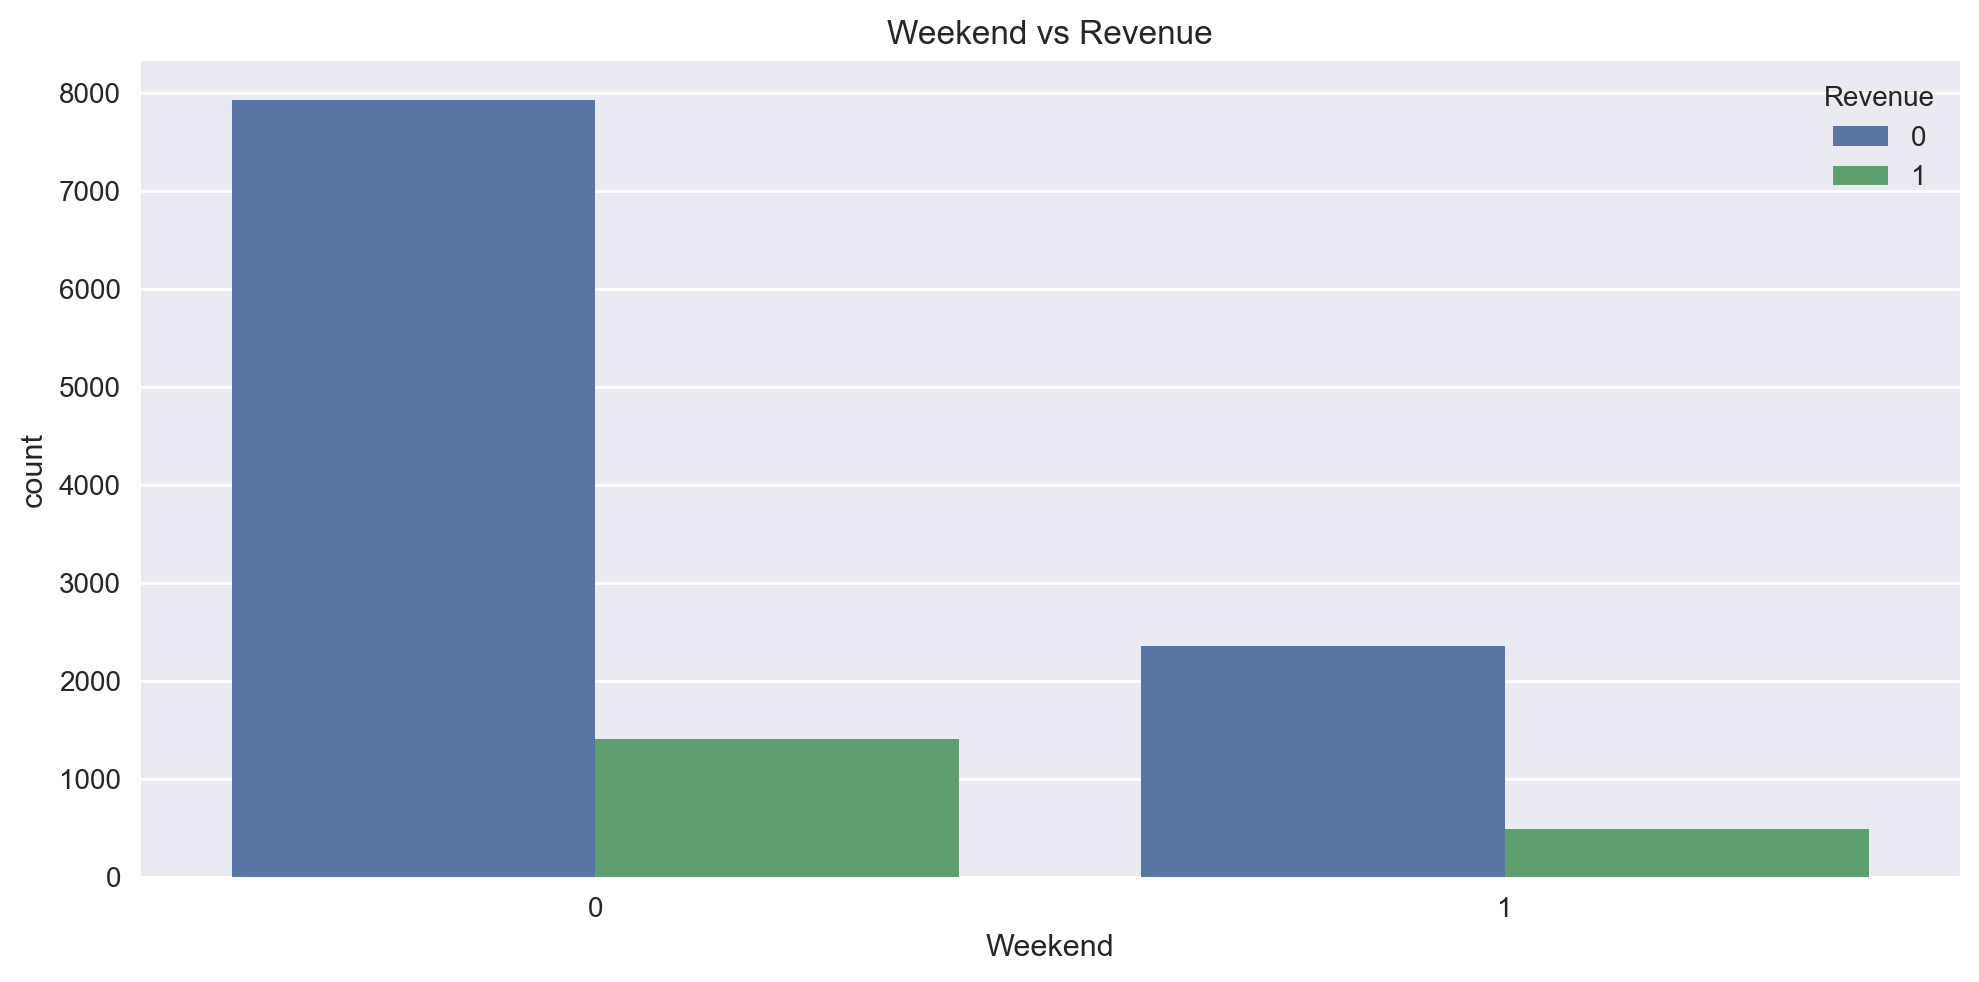

In [34]:
bivariate_plot('Weekend')

3. Examining the trend of purchase on **Month, Browser, OperatingSystems and Region**

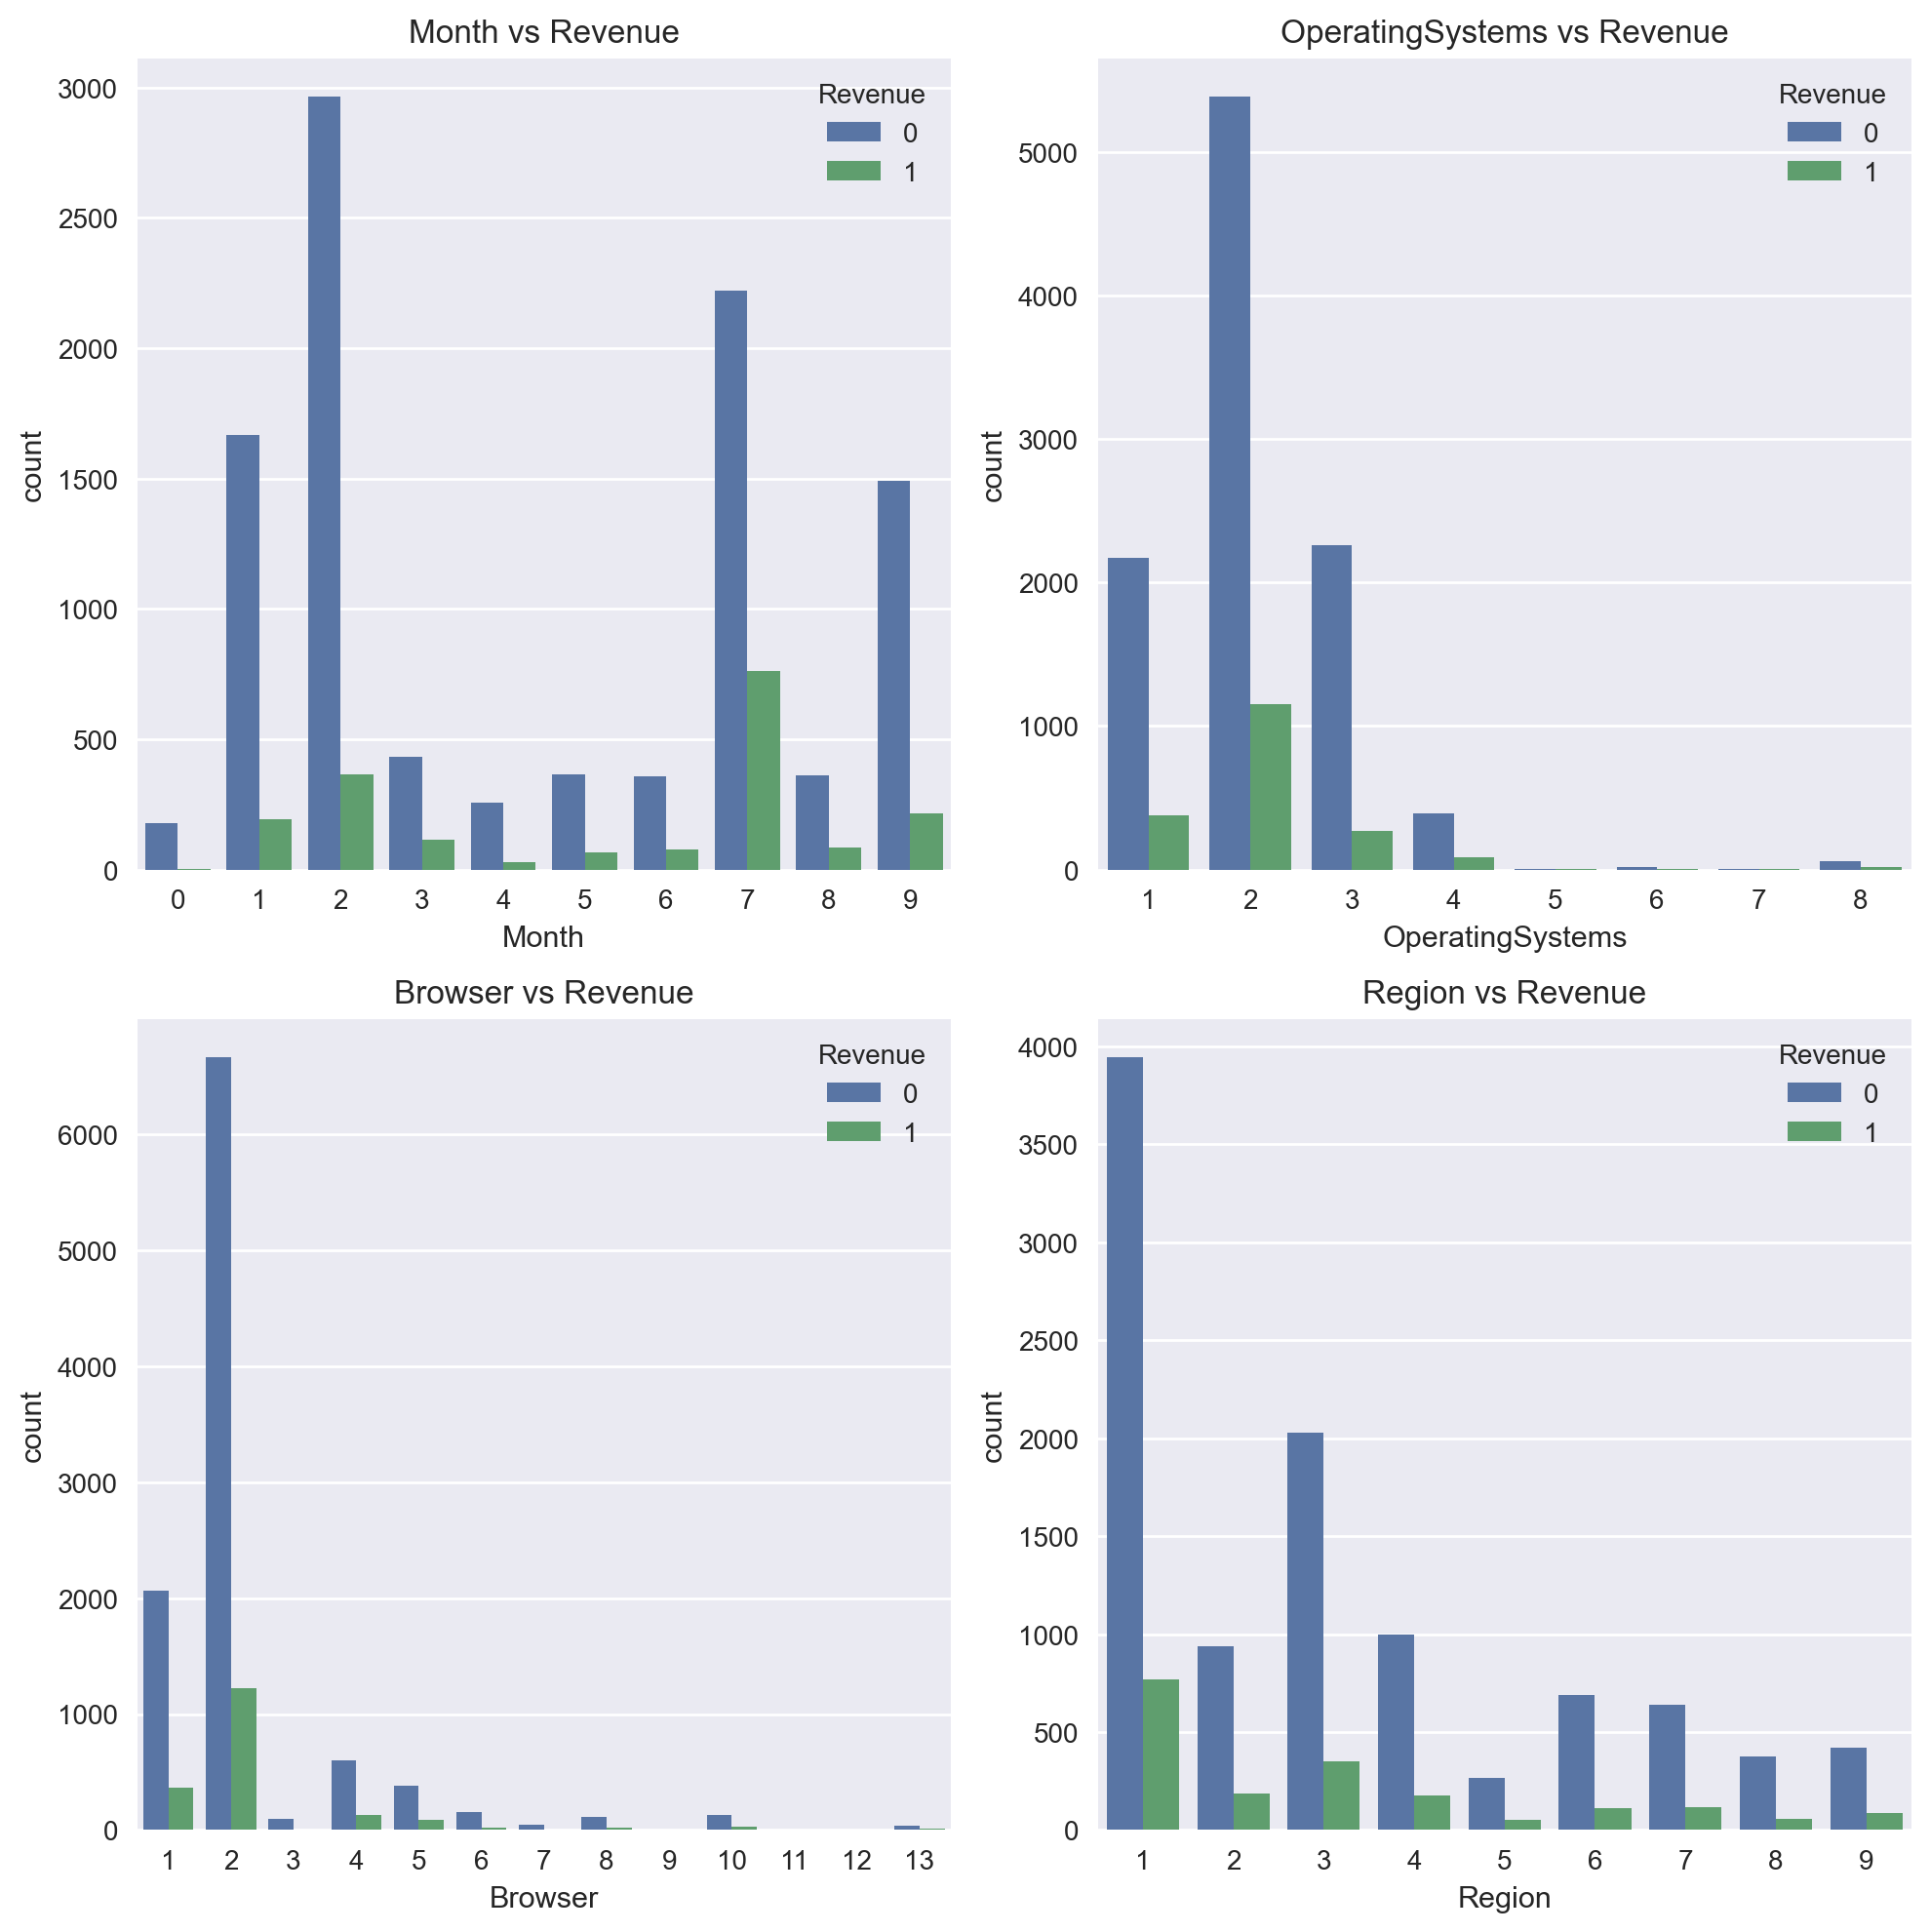

In [35]:
column_names = ['Month', 'OperatingSystems', 'Browser', 'Region']
rcParams['figure.figsize'] = 10, 10
for i in range(0, len(column_names)):
    plt.subplot (2, 2, i+1)
    sns.countplot(data = shoppers_data, x = column_names[i], hue = 'Revenue')
    plt.title(f'{column_names[i]} vs Revenue', fontsize = 12)
    plt.tight_layout()

***Inference*** :<br>

The majority of purchases are made :<br>
* by *Returning_Visitor in the VisitorType*
* on *Weekdays*
* in the *month of Nov*
* from *Region 1*
* using *Browser 2*
* on *OperatingSystem 2*


4. Relationship of **PageValues and ExitRates on Revenue**

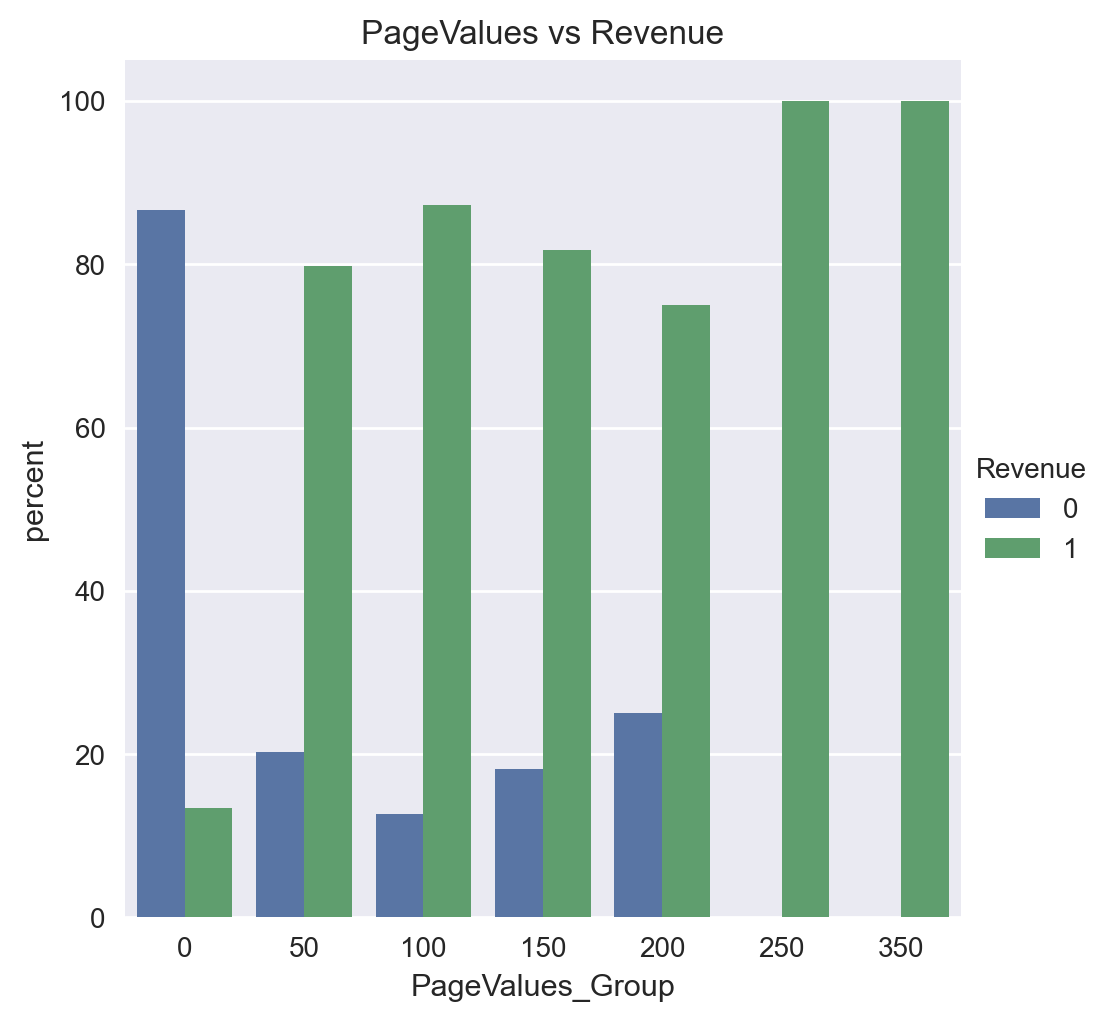

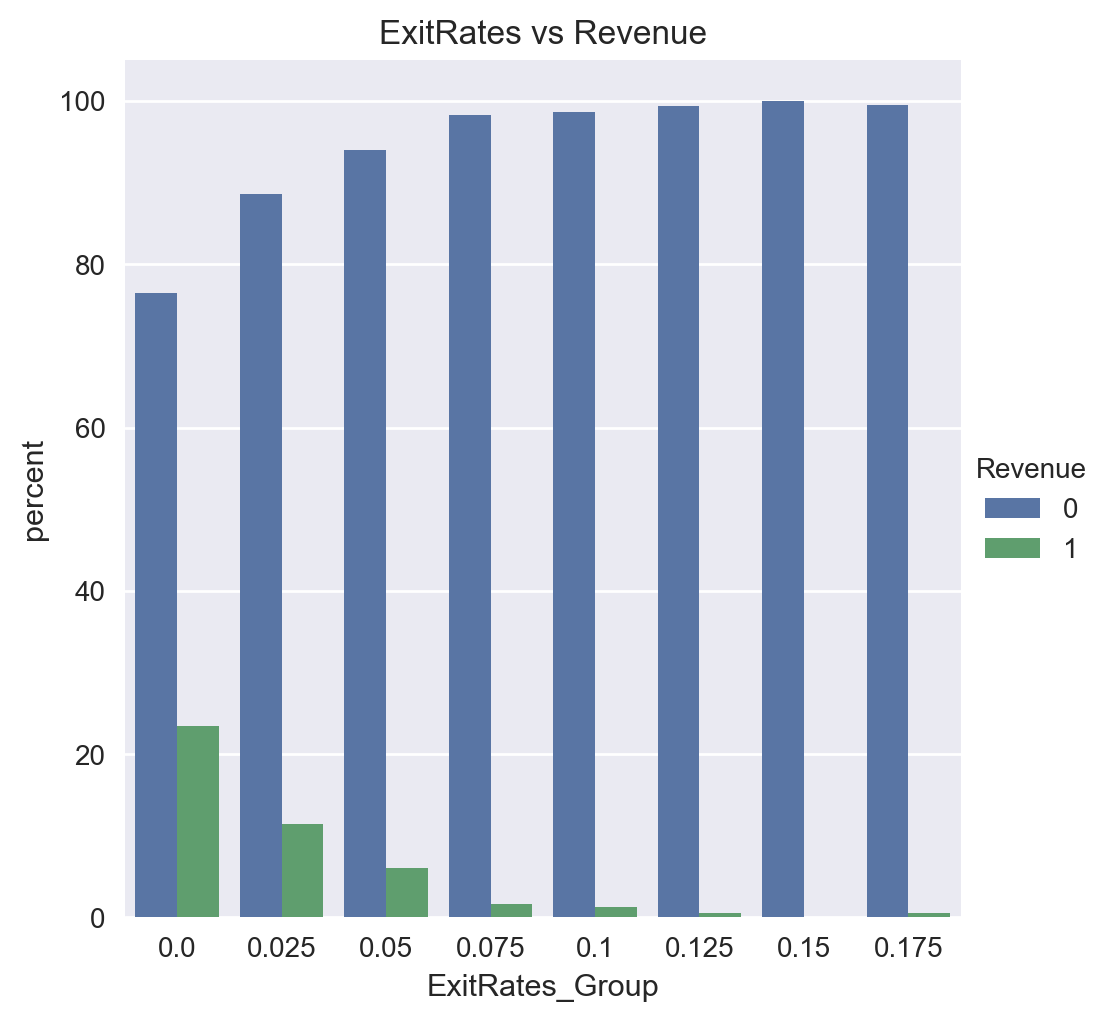

In [36]:
# split data frame in predifined PageValues groups
def cut_pageview(df):
    return pd.cut(
        df,[-1, 50, 100, 150, 200, 250, 300, 350, 400], 
        labels=[0, 50, 100, 150, 200, 250, 300, 350])

# split data frame in predifined ExitRates groups
def cut_exitrate(df):
    return pd.cut(
        df,[-1, 0.025, 0.050, 0.075, 0.1, 0.125, 0.150, 0.175, 0.201], 
        labels=[0, 0.025, 0.050, 0.075, 0.1, 0.125, 0.150, 0.175])

new_df = shoppers_data.copy()
new_df['PageValues_Group'] = new_df[['PageValues']].apply(cut_pageview)
new_df['ExitRates_Group'] = new_df[['ExitRates']].apply(cut_exitrate)

first = new_df.groupby(['Revenue', 'PageValues_Group']).count().reset_index()
first['Count'] = first['Administrative']
first = first[['Revenue', 'PageValues_Group', 'Count']]

second = new_df.groupby(['Revenue', 'ExitRates_Group']).count().reset_index()
second['Count'] = second['Administrative']
second = second[['Revenue', 'ExitRates_Group', 'Count']]

# (a) PageValues
x, y = 'PageValues_Group', 'Revenue'
(new_df.groupby(x)[y].value_counts(normalize = True).mul(100).rename('percent').reset_index()
.pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))
plt.title('PageValues vs Revenue', fontsize = 12)
plt.show()

# (b) ExitRates
x, y = 'ExitRates_Group', 'Revenue'
(new_df.groupby(x)[y].value_counts(normalize = True).mul(100).rename('percent').reset_index()
.pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))
plt.title('ExitRates vs Revenue', fontsize = 12)
plt.show()

***Inference :***

User creating Revenue in general have:
* Larger *PageValues*
* Less *ExitRates* 

We can have a hypothesis that, PageValues and ExitRates has influence on the purchase rate

    

5. Relationship of  **Informational_Duration, Administrative_Duration, ProductRealted_Duration and BounceRates on Revenue**

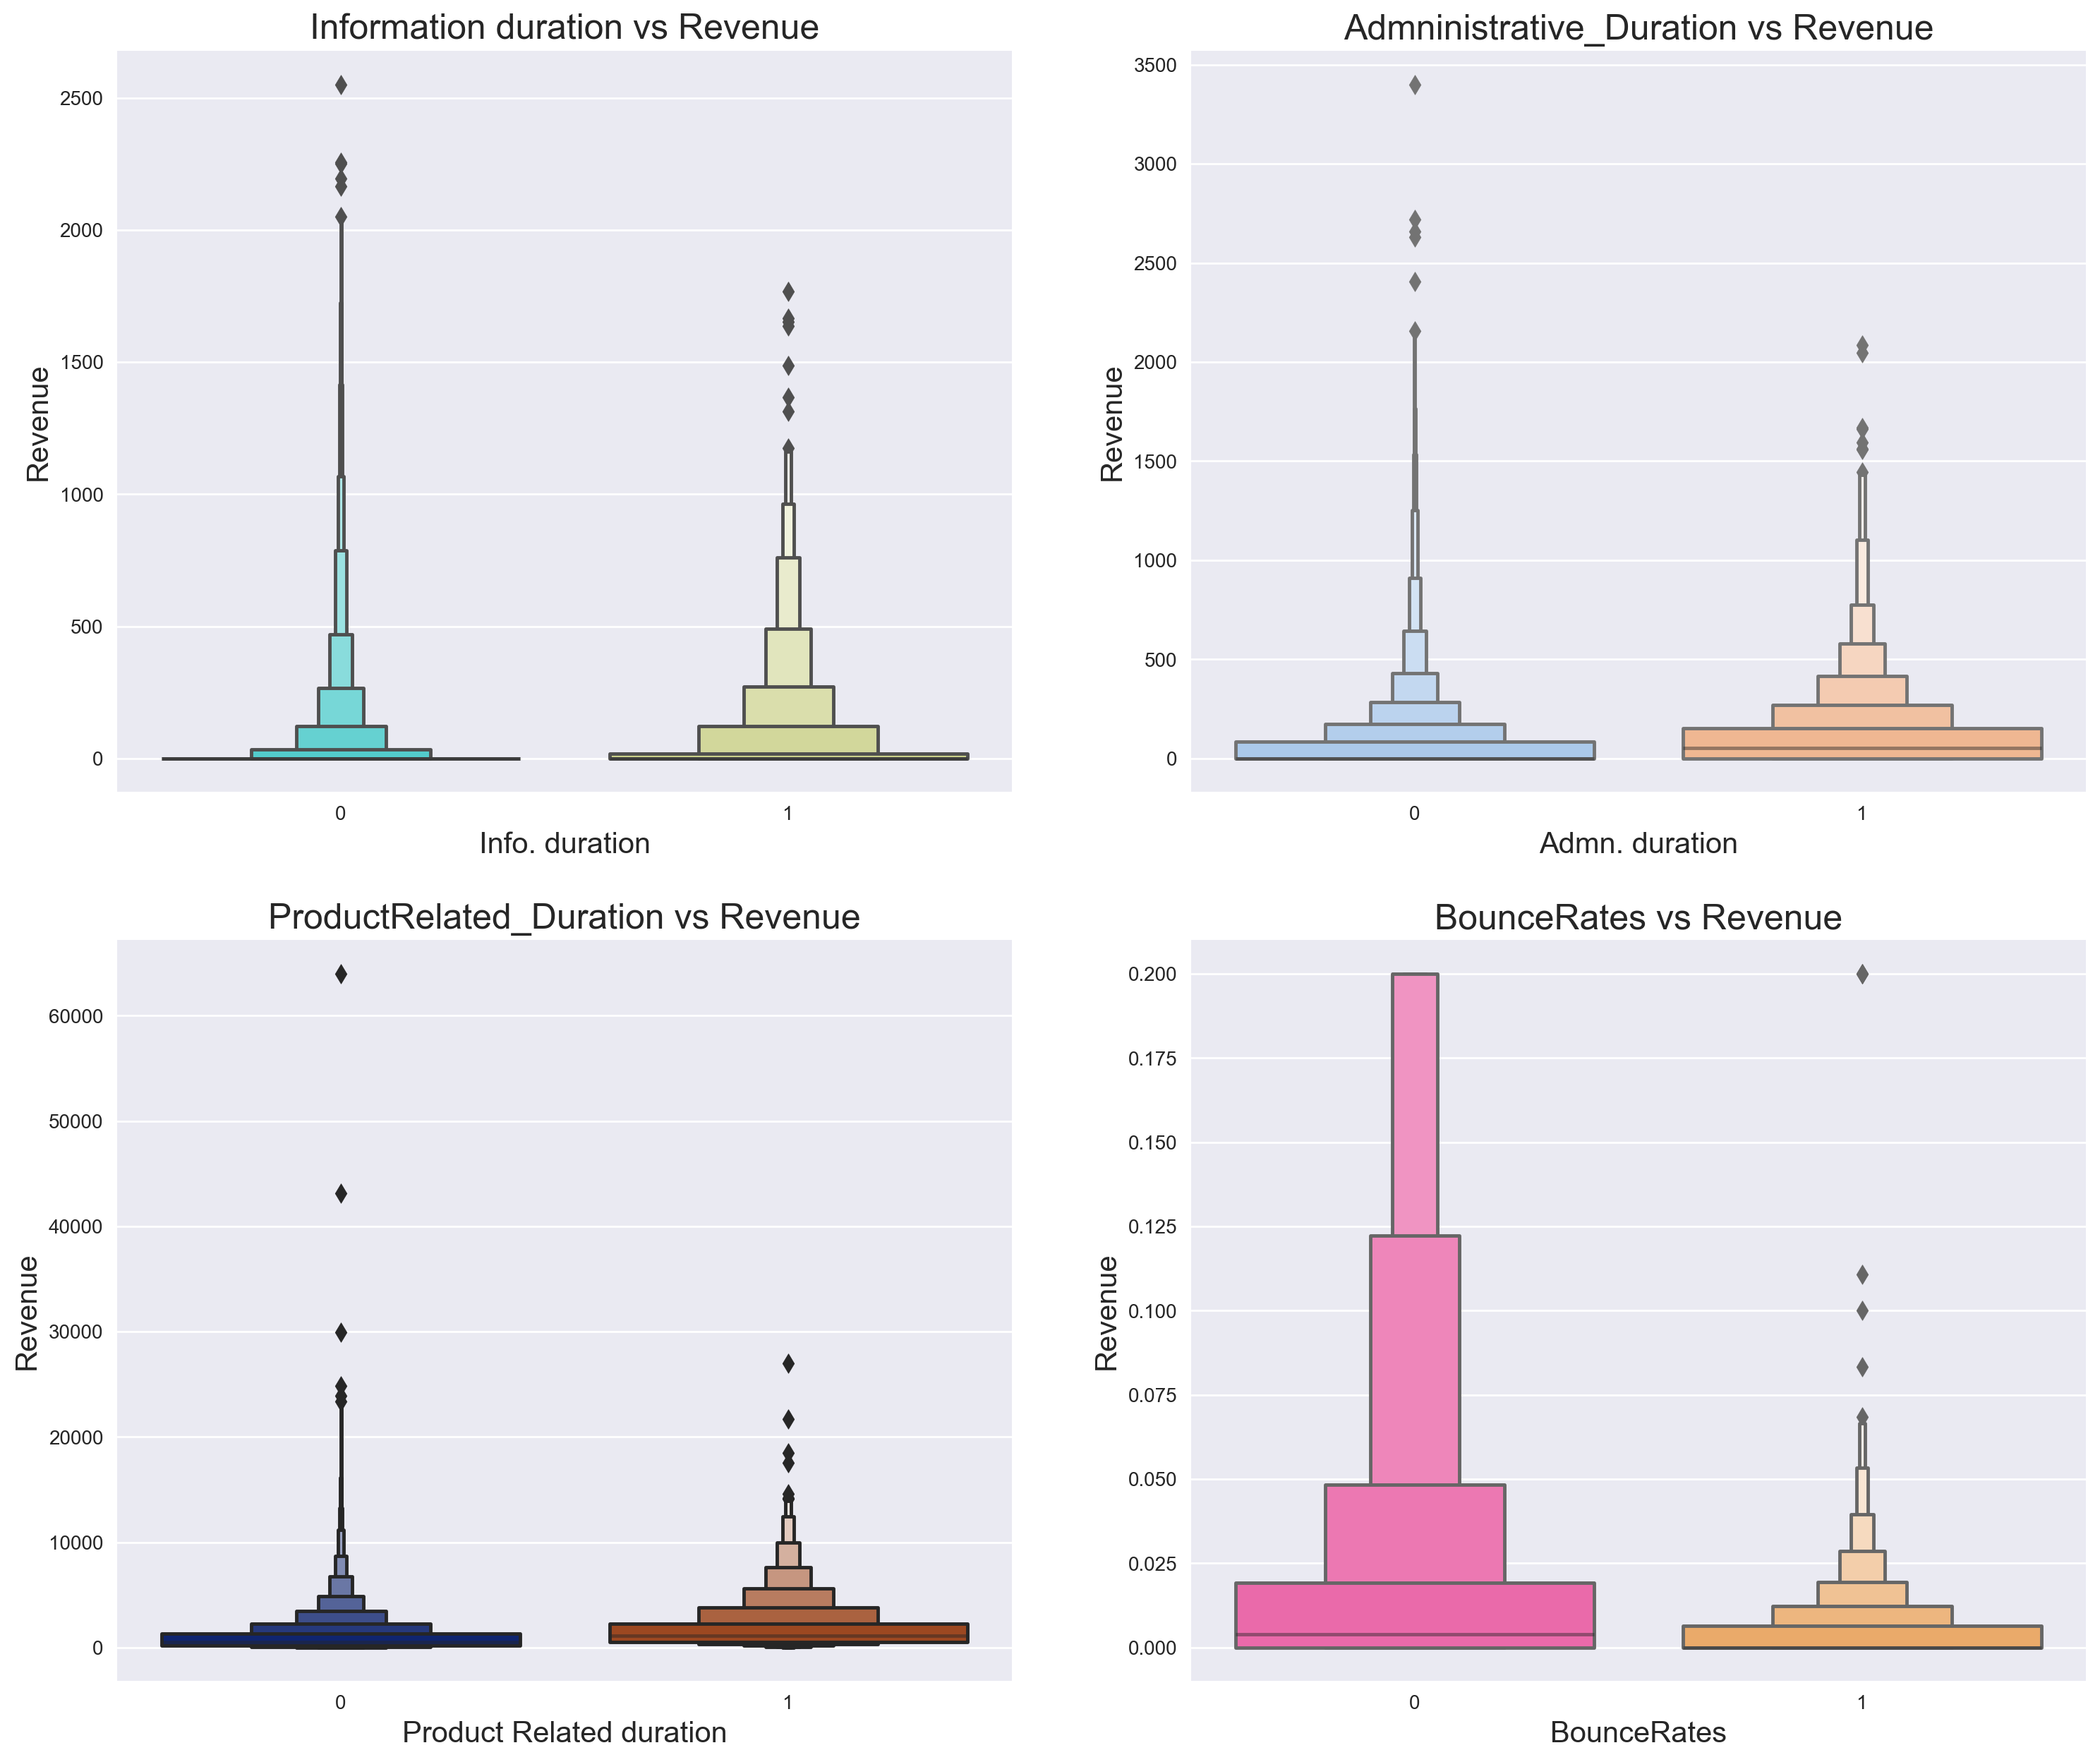

In [37]:
# informational duration vs revenue

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)
sns.boxenplot(shoppers_data['Revenue'], shoppers_data['Informational_Duration'], palette = 'rainbow')
plt.title('Information duration vs Revenue', fontsize = 18)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# administrative duration vs revenue

plt.subplot(2, 2, 2)
sns.boxenplot(shoppers_data['Revenue'], shoppers_data['Administrative_Duration'], palette = 'pastel')
plt.title('Admninistrative_Duration vs Revenue', fontsize = 18)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 3)
sns.boxenplot(shoppers_data['Revenue'], shoppers_data['ProductRelated_Duration'], palette = 'dark')
plt.title('ProductRelated_Duration vs Revenue', fontsize = 18)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bounce rate vs revenue

plt.subplot(2, 2, 4)
sns.boxenplot(shoppers_data['Revenue'], shoppers_data['BounceRates'], palette = 'spring')
plt.title('BounceRates vs Revenue', fontsize = 18)
plt.xlabel('BounceRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)


plt.show()

***Inference***

Revenue is influenced by less *BounceRates*

6. Determining the share of **Special Days** in **Month** and **Revenue**

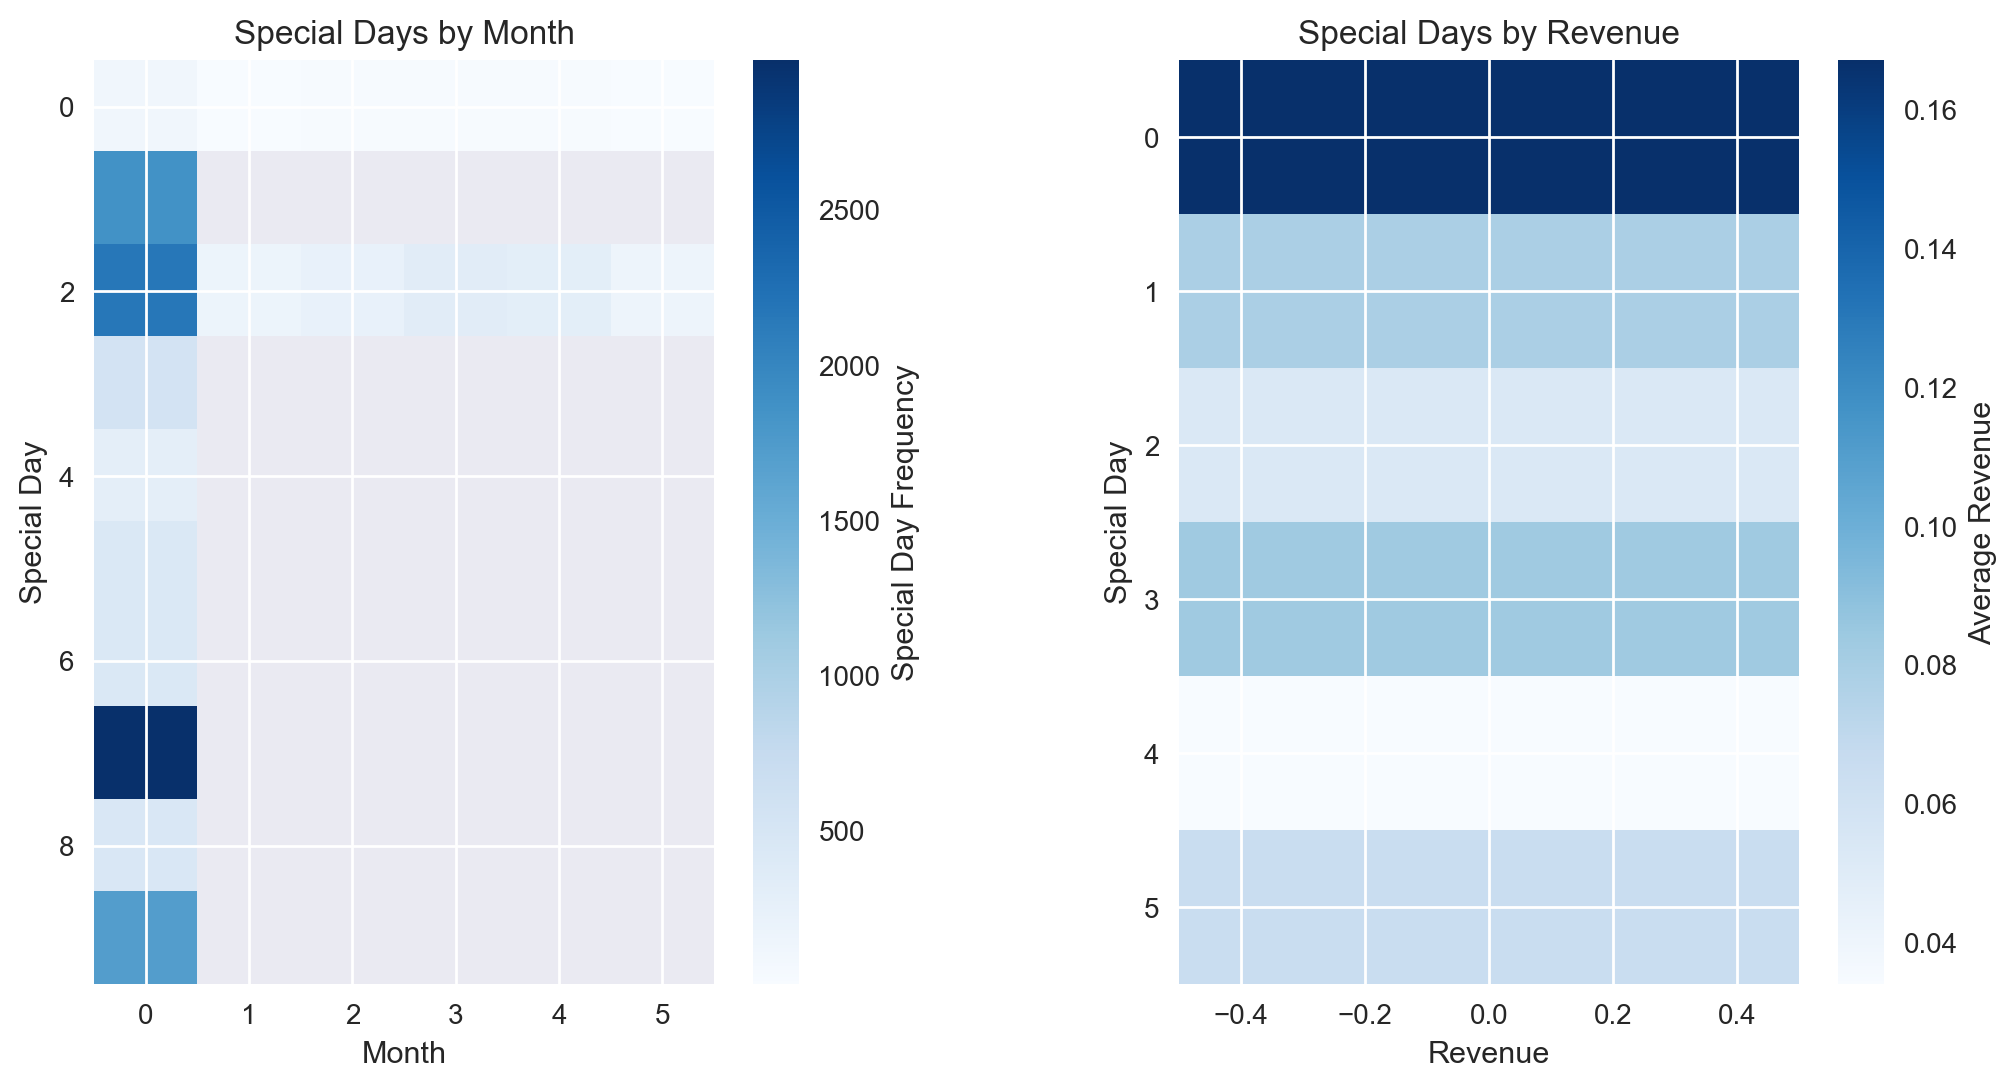

In [38]:
# Calculate the frequency of each special day within each month
special_day_counts = shoppers_data.groupby(['Month', 'SpecialDay']).size().unstack()

# Calculate the average revenue for each special day
avg_revenue_by_special_day = shoppers_data.groupby('SpecialDay')['Revenue'].mean()

# Create subplots for the two plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Special Days by Month
im1 = axes[0].imshow(special_day_counts.values, cmap='Blues', aspect='auto')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Special Day')
axes[0].set_title('Special Days by Month')

# Add colorbar as a legend for special days
cbar1 = fig.colorbar(im1, ax=axes[0])
cbar1.set_label('Special Day Frequency')

# Plot 2: Special Days by Revenue
im2 = axes[1].imshow(avg_revenue_by_special_day.values.reshape(-1, 1), cmap='Blues', aspect='auto')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('Special Day')
axes[1].set_title('Special Days by Revenue')

# Add colorbar as a legend for revenue
cbar2 = fig.colorbar(im2, ax=axes[1])
cbar2.set_label('Average Revenue')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)  # Increase the width spacing between subplots

# Display the plots
plt.show()


## Task 3: Data Modelling

We have chosen to do classification

### KNN

### Feature Selection

* Performing **Feature Selection**

In [39]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = shoppers_data.drop('Revenue', axis = 1)
y = shoppers_data['Revenue']
col_num = X.shape[1]
new_Ind = []
cur_MaxScore = 0.0
col_Ind_Random = shuffle(range(0, col_num), random_state=1)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X.iloc[:, new_Ind].copy()
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.25, random_state=0)
    clf = KNeighborsClassifier(4)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        
print("Selected features: ")
print(list(X.columns[new_Ind]))

Score with 1 selected features: 0.8440366972477065
Score with 2 selected features: 0.8440366972477065
Score with 3 selected features: 0.8446920052424639
Score with 4 selected features: 0.8446920052424639
Score with 5 selected features: 0.8741808650065531
Score with 6 selected features: 0.8754914809960681
Score with 7 selected features: 0.8787680209698558
Selected features: 
['Informational_Duration', 'Month', 'Weekend', 'SpecialDay', 'PageValues', 'Browser', 'OperatingSystems']


***Inference*** :<br>
From the 17 fetaures that are present in our dataset excluding the target column, we have selected 7 features that are found to be relevent to our further analysis using Data modelling

### Data Modelling using KNN 

In [40]:
selected_features = ['Informational_Duration', 'Month', 'Weekend', 'SpecialDay', 'PageValues', 'Browser', 'OperatingSystems']  # List of selected feature names

X = shoppers_data[selected_features]
y = shoppers_data['Revenue']

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors= 3, weights = 'uniform', p=2)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)

print(cm)
print(clf.score(X_test, y_test))


[[2447  133]
 [ 227  245]]
0.8820445609436435


In [41]:
#Classification Accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2580
           1       0.65      0.52      0.58       472

    accuracy                           0.88      3052
   macro avg       0.78      0.73      0.75      3052
weighted avg       0.87      0.88      0.88      3052



### Decision Tree


### Feature Selection

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = shoppers_data.drop('Revenue', axis=1)
y = shoppers_data['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Get the feature importances from the trained decision tree
importances = clf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# Select the top k features based on their importances
k = 10  # Number of top features to select
new_selected_features = X.columns[sorted_indices[:k]]

print("Selected features:")
print(new_selected_features)


Selected features:
Index(['PageValues', 'ExitRates', 'ProductRelated_Duration', 'ProductRelated',
       'BounceRates', 'Administrative_Duration', 'Month', 'Administrative',
       'TrafficType', 'Region'],
      dtype='object')


### Data Modelling using Decision Tree

In [43]:

X = shoppers_data[new_selected_features]
y = shoppers_data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0, max_depth=7, min_samples_leaf=2, min_samples_split=5)
fit = clf.fit(X_train, y_train)
y_pred = fit.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(clf.score(X_test, y_test))


[[2456  124]
 [ 197  275]]
0.8948230668414154


In [44]:
#Determining Accuracy
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2580
           1       0.69      0.58      0.63       472

    accuracy                           0.89      3052
   macro avg       0.81      0.77      0.79      3052
weighted avg       0.89      0.89      0.89      3052



### Cross Validation for KNN

In [45]:
from sklearn.model_selection import cross_val_score

X = shoppers_data[selected_features]
y = shoppers_data['Revenue']

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Perform cross-validation
scores = cross_val_score(knn, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.8996313  0.88324457 0.81769766 0.84801311 0.83818107]
Mean Accuracy: 0.85735354362966


### Cross Validation for Decision Tree

In [46]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

dt = DecisionTreeClassifier(random_state=0)
kf = KFold(n_splits=5, random_state=0, shuffle=True)

# Perform cross-validation with fixed random seed
scores = cross_val_score(dt, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))



Cross-Validation Scores: [0.87177386 0.86603851 0.8623515  0.87218353 0.85088079]
Mean Accuracy: 0.8646456370340024
